## TRABALHO PRÁTICO - Introdução à Ciência de Dados

**GRUPO 5 - DENGUE**

**Integrantes:**

Lean Henrique Pereira Miranda

Lucas Cassio Costa

Nicolas Von Dolinger Moreira Rocha

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
from scipy.stats import ttest_ind, f_oneway, kruskal, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error

sns.set_palette("RdPu")

# **Introdução**
## Motivação e Perguntas a serem respondidas

  A motivação para a escolha desse tema se deve as diversas situações relacionadas a surtos de denque o Brasil passou recentemente. Nesse sentido, as perguntas feitas e os dataset's selecionados tem o objetivo de relacionar as diferentes realidades sociais e naturais do Brasil ao número de casos de dengue. Segue abaixo as diferentes perguntas a serem respondidas.

  - Como a incidência de casos de dengue varia ao longo do ano? Existem períodos sazonais de pico?
  - Quais são as áreas geográficas com maior incidência da dengue?
  - Existe alguma relação entre a urbanização, o saneamento básico e a incidência de dengue?
  - Existe alguma correlação entre fatores ambientais, como temperatura e pluviosidade, e o aumento dos casos de dengue? Como esses fatores podem estar relacionados à propagação da doença?

  Portanto, as perguntas estão relacionadas com a nossa motivação de analisar como a dengue pode ser impulsionada ou não de acordo com a realidade brasileira.

## Metodologia
### Descrição da Base

Para abordar as perguntas feitas, foram utilizadas diversas bases de dados. Para facilitar a descrição e a identificação durante a leitura do código, foram utilizados os nomes de cada dataset em si.

   - **meses**: dataset com o número de casos prováveis por mês.
   - **municipios_casos**: possui o número do IBGE referente ao município de notificação e seu nome, e a segunda o número de casos prováveis.
   - **municipios**: possui diversas colunas, sendo as utilizadas a o nome do município, o número do município no IBGE, a UF, o nome do município, a região a qual ele pertence e a população.
   - **municipios_extr_pobreza**: esse dataset possui o numero do IBGE do municipio, o nome e o número de casos em 2023.

As referências dos datasets utilizados se encontram ao final do notebook.

### Métodos Utilizados

  Descrição dos metodos

# ***1 - Como a incidência de casos de dengue varia ao longo do ano? Existem períodos sazonais de pico?***

## Número de casos por mês

Nessa primeira análise superficial do nosso dataset "meses", queremos mostrar a quantidade de casos distribuidos ao longo ano, em cada mês, para analisar a possibilidade de um período do ano possuir uma concentração de casos maior.

In [ ]:
# Carregar os dados
meses = pd.read_csv("https://drive.google.com/uc?export=download&id=1fVIp_n-hu3pQ0goX-w8JE3qwbQ3TIsBf", delimiter=';')
meses = meses[meses['Mês notificação'] != 'Total']

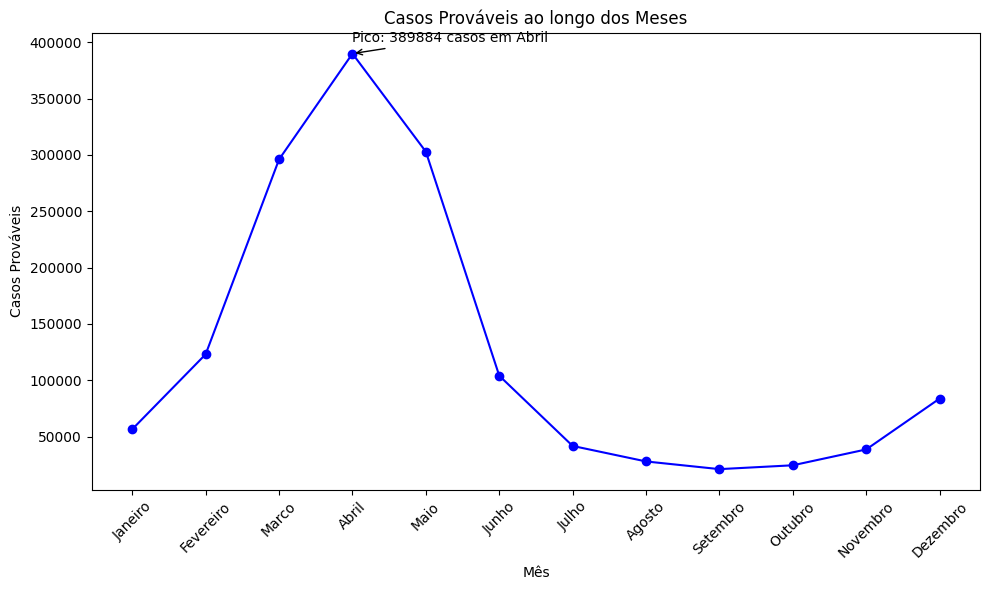

In [ ]:
# Converter os valores da coluna 'Casos Prováveis' para inteiros
meses['Casos Prováveis'] = meses['Casos Prováveis'].astype(int)

# Encontrar o mês com o pico
mes_pico = meses.loc[meses['Casos Prováveis'].idxmax()]

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(meses.index, meses['Casos Prováveis'], marker='o', color='b')
plt.title('Casos Prováveis ao longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Casos Prováveis')
plt.xticks(range(0, len(meses)), meses['Mês notificação'], rotation=45)
plt.annotate(f"Pico: {mes_pico['Casos Prováveis']} casos em {mes_pico['Mês notificação']}",
             xy=(mes_pico.name, mes_pico['Casos Prováveis']),
             xytext=(mes_pico.name, mes_pico['Casos Prováveis'] + 10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()
plt.show()


## Teste de Hipótese:

**Hipótese Nula** (H0): Não há diferença significativa entre as médias dos casos de dengue dos dois períodos (fevereiro - junho) e (julho - janeiro).

**Hipótese Alternativa** (H1): Há uma diferença significativa entre as médias dos casos de dengue dos dois períodos (fevereiro - junho) e (julho - janeiro).

Média Período 1: 229976.25
Média Período 2: 42065.42857142857
Intervalo de Confiança 95% (Bootstrap): (68622.81071428572, 310883.8928571429)
Média da Diferença de Médias Bootstrap: 188197.0857035714


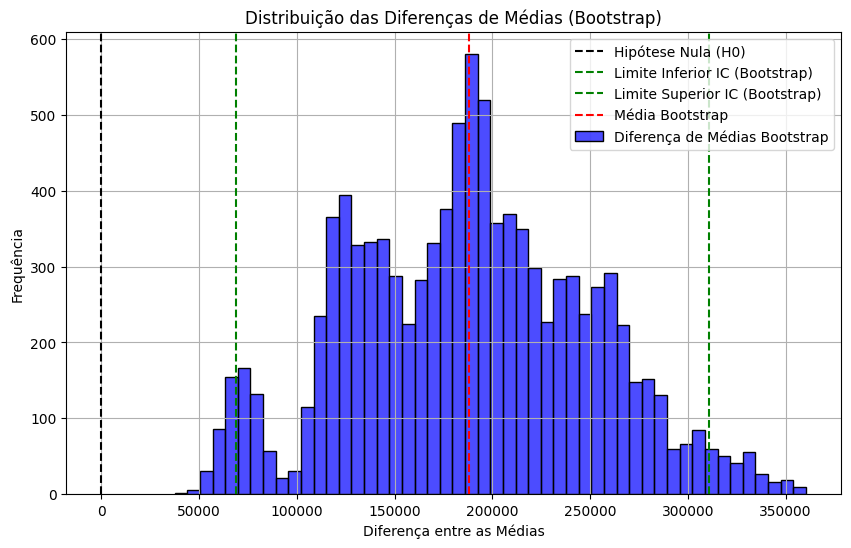

In [ ]:
# Filtrar os dados para os dois períodos
periodo1 = meses[meses['Mês notificação'].isin(['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'])]
periodo2 = meses[meses['Mês notificação'].isin(['Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Janeiro'])]

# Selecionar a coluna 'Casos Prováveis'
casos1 = periodo1['Casos Prováveis']
casos2 = periodo2['Casos Prováveis']

# Calcular médias para exibir depois
mean1 = casos1.mean()
mean2 = casos2.mean()

# Número de reamostragens
n_bootstraps = 10000

# Inicializar uma lista para armazenar as diferenças de médias bootstrap
bootstrap_diffs = []

# Gerar as amostras bootstrap e calcular a diferença das médias para cada amostra
for _ in range(n_bootstraps):
    # Amostrar com reposição dos dados dos dois períodos
    sample1 = casos1.sample(n=len(casos1), replace=True)
    sample2 = casos2.sample(n=len(casos2), replace=True)

    # Calcular a diferença das médias e armazenar
    diff = sample1.mean() - sample2.mean()
    bootstrap_diffs.append(diff)

# Converter para array numpy para facilitar o cálculo
bootstrap_diffs = np.array(bootstrap_diffs)

# Calcular o intervalo de confiança usando percentis
ci_lower = np.percentile(bootstrap_diffs, 2.5)
ci_upper = np.percentile(bootstrap_diffs, 97.5)

# Calcular a média da diferença bootstrap
diff_mean = np.mean(bootstrap_diffs)

# Exibir resultados
print(f"Média Período 1: {mean1}")
print(f"Média Período 2: {mean2}")
print(f"Intervalo de Confiança 95% (Bootstrap): ({ci_lower}, {ci_upper})")
print(f"Média da Diferença de Médias Bootstrap: {diff_mean}")

# Gráfico da distribuição bootstrap
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, bins=50, kde=False, color='blue', alpha=0.7, label='Diferença de Médias Bootstrap')
plt.axvline(x=0, color='black', linestyle='--', label='Hipótese Nula (H0)')
plt.axvline(x=ci_lower, color='green', linestyle='--', label='Limite Inferior IC (Bootstrap)')
plt.axvline(x=ci_upper, color='green', linestyle='--', label='Limite Superior IC (Bootstrap)')
plt.axvline(x=diff_mean, color='red', linestyle='--', label='Média Bootstrap')

plt.xlabel('Diferença entre as Médias')
plt.ylabel('Frequência')
plt.title('Distribuição das Diferenças de Médias (Bootstrap)')
plt.legend()
plt.grid(True)
plt.show()


## Resultados Obtidos

Com 95% de confiança, **rejeitamos** a hipótese nula.

Há uma diferença significativa entre as médias dos casos de dengue dos dois períodos (fevereiro - junho) e (julho - janeiro).

**Média Período 1**: 229976.25

**Média Período 2**: 42065.42857142857

**Intervalo de Confiança 95%** (Bootstrap): [69371.15089285714, 307353.1107142857]

**Média da Diferença de Médias Bootstrap**: 187185.6658607143

# ***2 - Quais são as áreas geográficas com maior incidência da dengue?***

## Merge de Datasets

Nesse primeira fase de pré-processamento, foram importados dois datasets diferentes (**municipios_casos** e **municipios**). Para fazer o restante da análise, foi necessário fazer o merge dessas diferentes bases, usando como referência o número do IBGE referente a cada município, formando assim o novo dataset "municipios_casos", que recebeu as informações extras de "municipios".

In [ ]:
# Carregar os dados
municipios_casos = pd.read_csv("https://drive.google.com/uc?export=download&id=1Hy38dlVpCUMKXePuO4lXf3P-mwwWxCwn", delimiter=";")
municipios = pd.read_csv("https://drive.google.com/uc?export=download&id=13v3Iwgq4gnkGS7B77z3tKRX5JaJVTXOp", delimiter=";")

In [ ]:
# Preencher valores nulos com string vazia
municipios_casos['Município de notificação'].fillna('', inplace=True)

# Extrair códigos IBGE da segunda tabela
municipios_casos['IBGE'] = municipios_casos['Município de notificação'].str.extract('(\d+)')

# Remover linhas onde IBGE é nulo
municipios_casos = municipios_casos.dropna(subset=['IBGE'])

# Converter IBGE para inteiro
municipios_casos['IBGE'] = municipios_casos['IBGE'].astype(int)

# Concatenar as tabelas
municipios_casos = pd.merge(municipios, municipios_casos[['IBGE', 'Casos Prováveis']], on='IBGE', how='inner')

# Remover colunas desnecessárias
municipios_casos = municipios_casos.drop(columns=['ConcatUF+Mun', 'IBGE7', 'Unnamed: 9'])
municipios_casos = municipios_casos.dropna(subset=['População 2010'])

<ipython-input-255-76e56fdad1ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipios_casos['IBGE'] = municipios_casos['IBGE'].astype(int)


## Primeira Análise

Com o código abaixo, apenas geramos a tabela das regiões com mais casos por 100 habitantes e após isso o plot dessa tabela.

In [ ]:
casos_por_regiao = municipios_casos.groupby('Região').sum('Casos Prováveis')

# Calcular a proporção de casos por região a cada 100 habitantes
casos_por_regiao["Proporcao de Casos por 100 Habitantes"] = (casos_por_regiao["Casos Prováveis"] / casos_por_regiao["População 2010"]) * 100
casos_por_regiao = casos_por_regiao.sort_values("Proporcao de Casos por 100 Habitantes", ascending=False)

<ipython-input-257-28929d71cd8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


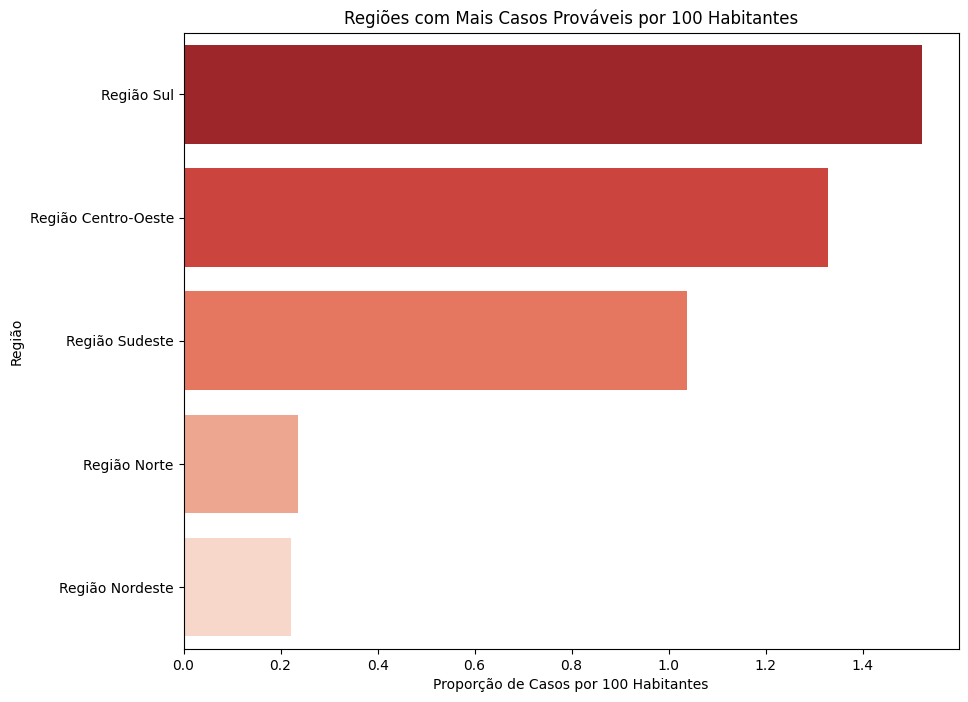

In [ ]:
colors = sns.color_palette("Reds", len(casos_por_regiao))[::-1]
plt.figure(figsize=(10, 8))
sns.barplot(
    y=casos_por_regiao.index,
    x=casos_por_regiao['Proporcao de Casos por 100 Habitantes'],
    palette=colors
)
plt.xlabel('Proporção de Casos por 100 Habitantes')
plt.ylabel('Região')
plt.title('Regiões com Mais Casos Prováveis por 100 Habitantes')
plt.show()

## Segunda Análise

Com o código abaixo, foram calculados os municípios com mais casos por 100 habitantes e logo após isso o plot dessa tabela.

In [ ]:
municipios_com_mais_casos = municipios_casos.groupby('Município').sum('Casos Prováveis')
municipios_com_mais_casos["Proporcao de Casos por 100 Habitantes"] = (municipios_com_mais_casos["Casos Prováveis"] / municipios_com_mais_casos["População 2010"]) * 100

<ipython-input-259-7b8fac1166c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


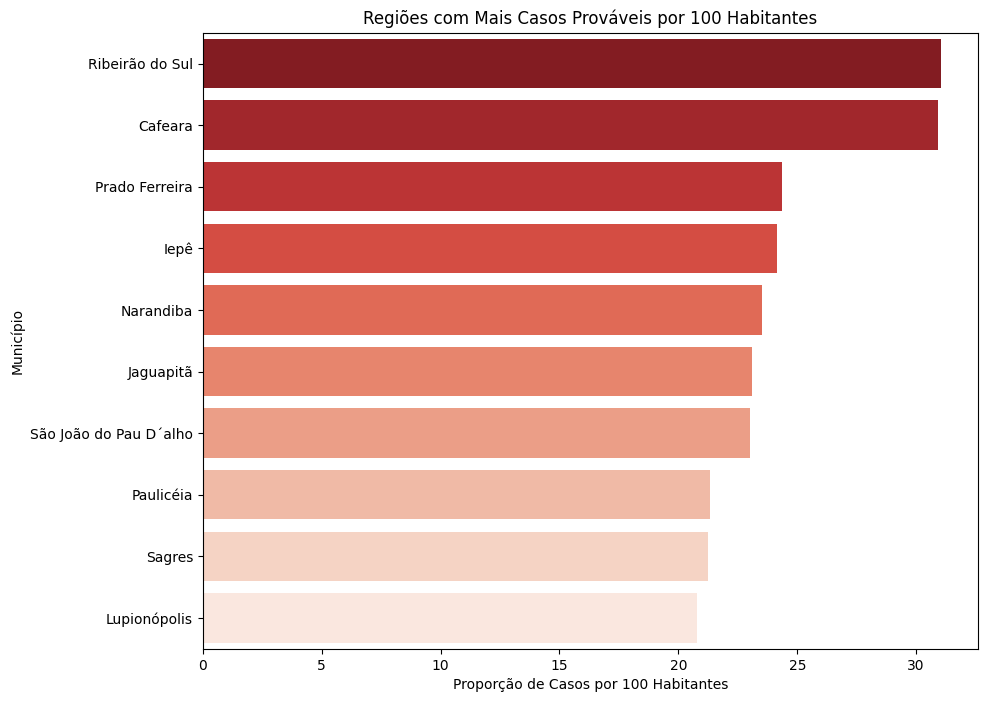

In [ ]:
municipios_com_mais_casos = municipios_com_mais_casos.nlargest(10, 'Proporcao de Casos por 100 Habitantes')
colors = sns.color_palette("Reds", len(municipios_com_mais_casos))[::-1]

plt.figure(figsize=(10, 8))
sns.barplot(
    y=municipios_com_mais_casos.index,
    x=municipios_com_mais_casos['Proporcao de Casos por 100 Habitantes'],
    palette=colors
)
plt.xlabel('Proporção de Casos por 100 Habitantes')
plt.ylabel('Município')
plt.title('Regiões com Mais Casos Prováveis por 100 Habitantes')
plt.show()

## Terceira Análise

Com o código abaixo, foram calculados as capitais com mais casos por 100 habitantes e logo após isso o plot dessa tabela.

In [ ]:
capitais_com_mais_casos = municipios_casos[municipios_casos["Capital"] == "Capital"]
capitais_com_mais_casos["Proporcao de Casos por 100 Habitantes"] = (capitais_com_mais_casos["Casos Prováveis"] / capitais_com_mais_casos["População 2010"]) * 100
capitais_com_mais_casos = capitais_com_mais_casos.sort_values("Proporcao de Casos por 100 Habitantes", ascending=False)

<ipython-input-260-2196a80e73a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capitais_com_mais_casos["Proporcao de Casos por 100 Habitantes"] = (capitais_com_mais_casos["Casos Prováveis"] / capitais_com_mais_casos["População 2010"]) * 100


<ipython-input-261-b197a89071ce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


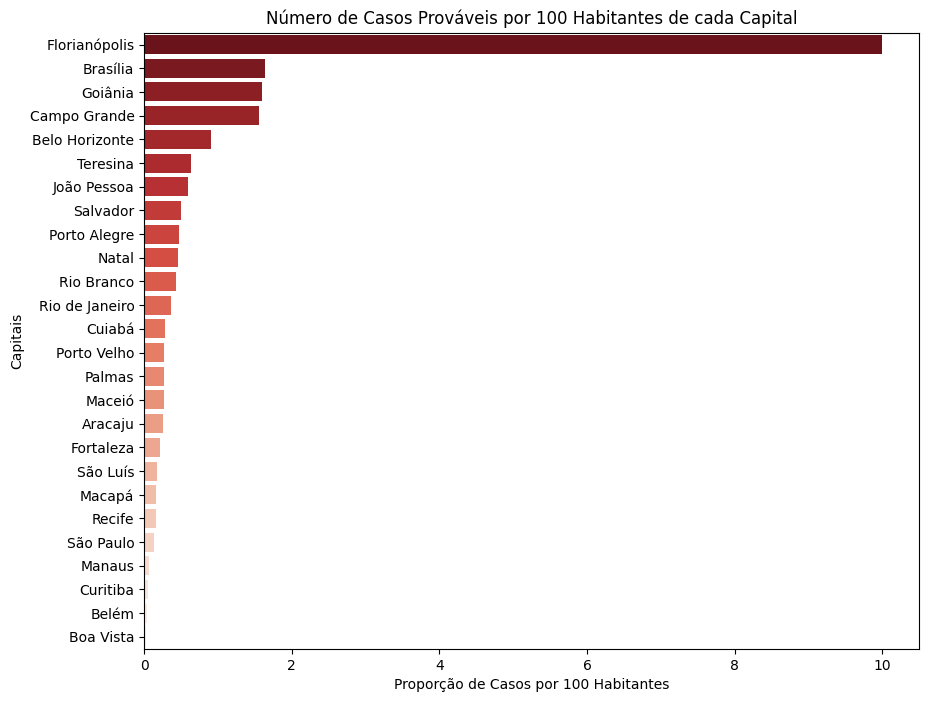

In [ ]:
colors = sns.color_palette("Reds", len(capitais_com_mais_casos))[::-1]

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
sns.barplot(
    y=capitais_com_mais_casos['Município'],
    x=capitais_com_mais_casos['Proporcao de Casos por 100 Habitantes'],
    palette=colors
)
plt.xlabel('Proporção de Casos por 100 Habitantes')
plt.ylabel('Capitais')
plt.title('Número de Casos Prováveis por 100 Habitantes de cada Capital')
plt.show()


## Teste de Hipótese

**Hipótese Nula** (H0): A proporção de casos de dengue por 100 habitantes na Região Sul não é significativamente maior do que a proporção de casos na região Centro-Oeste

**Hipótese Alternativa** (H1): A proporção de casos de dengue por 100 habitantes na Região Sul é significativamente maior do que a proporção de casos na região Centro-Oeste

In [ ]:
def bootstrap(data1, data2, n_sub=1000):
    size1 = len(data1)
    size2 = len(data2)
    values = np.zeros(n_sub)

    for i in range(n_sub):
        sample1 = data1.sample(size1, replace=True)
        sample2 = data2.sample(size2, replace=True)

        # Convertendo as séries para arrays NumPy
        v1 = sample1["Casos Prováveis"].sum() / sample1["População 2010"].sum() * 100
        v2 = sample2["Casos Prováveis"].sum() / sample2["População 2010"].sum() * 100
        diff = v1 - v2
        values[i] = diff

    # Gerando valores inferior e superior para um nível de confiança de 95%
    LI = np.percentile(values, 2.5)
    LS = np.percentile(values, 97.5)
    return values, LI, LS

municipios_casos['Casos Prováveis'] = municipios_casos['Casos Prováveis'].astype(int)
municipios_casos['População 2010'] = municipios_casos['População 2010'].astype(int)

regiao_sul = municipios_casos[municipios_casos["Região"] == "Região Sul"]
regiao_centro_oeste = municipios_casos[municipios_casos["Região"] == "Região Centro-Oeste"]

# Executar o bootstrap
diff_values, LI, LS = bootstrap(regiao_sul, regiao_centro_oeste)

# Teste da Hipótese
if LI > 0:
    print(f"Com 95% de confiança, rejeitamos a hipótese nula. A proporção de casos de dengue por 100 habitantes na Região Sul é significativamente maior do que na Região Centro-Oeste.")
else:
    print(f"Com 95% de confiança, não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a proporção de casos de dengue por 100 habitantes na Região Sul é significativamente maior do que na Região Centro-Oeste.")

print(f"Intervalo de Confiança de 95% para a diferença de proporções: ({LI}, {LS})")


Com 95% de confiança, não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a proporção de casos de dengue por 100 habitantes na Região Sul é significativamente maior do que na Região Centro-Oeste.
Intervalo de Confiança de 95% para a diferença de proporções: (-0.44732350651962094, 0.9528273906365474)


### Resultado

Com 95% de confiança, **não rejeitamos** a hipótese nula. Não há evidência suficiente para afirmar que a proporção de casos de dengue por 100 habitantes na Região Sul é significativamente maior do que na Região Centro-Oeste.

Intervalo de Confiança de 95% para a diferença de proporções (aproximados): [-0.4557, 0.9252]

## Quarta Análise

Com o código abaixo, o objetivo é criar 3 classes (baixo, médio e alto) com base no número de casos a cada 100 habitantes de cada município e classificar os dados com base nas features.

Foram utilizados os seguintes modelos: Regressão Logística, KNN, Árvore de Decisão e Random Forest.

In [ ]:
# Calcular a proporção de casos por 100 habitantes
municipios_casos['Proporcao de Casos por 100 Habitantes'] = (municipios_casos['Casos Prováveis'] / municipios_casos['População 2010']) * 100

# Calcular os percentis
percentil_33 = np.percentile(municipios_casos['Proporcao de Casos por 100 Habitantes'], 33)
percentil_66 = np.percentile(municipios_casos['Proporcao de Casos por 100 Habitantes'], 66)

# Classificar os dados com base nos percentis
def classify_proportion(proportion):
    if proportion <= percentil_33:
        return 'Baixo'
    elif percentil_33 < proportion <= percentil_66:
        return 'Médio'
    else:
        return 'Alto'

municipios_casos['Classificação'] = municipios_casos['Proporcao de Casos por 100 Habitantes'].apply(classify_proportion)

# Substituir NaNs em 'Capital' por 'Não Capital'
municipios_casos['Capital'] = municipios_casos['Capital'].fillna('Não Capital')

# Selecionar features e target
X = municipios_casos[['UF', 'Região', 'População 2010', 'Porte', 'Capital']]
y = municipios_casos['Classificação']

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['População 2010']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['UF', 'Região', 'Porte', 'Capital'])
    ])

# Pipeline para diferentes modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Treinar o modelo
    pipeline.fit(X_train, y_train)

    # Fazer previsões
    y_pred = pipeline.predict(X_test)

    # Avaliar o modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)


    results[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': cf
    }

# Imprimir os resultados
for name, metrics in results.items():
    print("Confusion Matrix")
    print(metrics['confusion_matrix'])
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("-" * 40)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
[[  0   0 467]
 [  0   0 453]
 [  0   0 440]]
Model: Logistic Regression
Accuracy: 0.32
Classification Report:
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00       467
       Baixo       0.00      0.00      0.00       453
       Médio       0.32      1.00      0.49       440

    accuracy                           0.32      1360
   macro avg       0.11      0.33      0.16      1360
weighted avg       0.10      0.32      0.16      1360

----------------------------------------
Confusion Matrix
[[216 156  95]
 [208 159  86]
 [215 140  85]]
Model: KNN
Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

        Alto       0.34      0.46      0.39       467
       Baixo       0.35      0.35      0.35       453
       Médio       0.32      0.19      0.24       440

    accuracy                           0.34      1360
   macro avg       0.34      0.34      0.33      1360
weighted avg

## Resultado

Os modelos tiveram a seguinte acurácia:

 - Logistic Regression: 0.32
 - KNN: 0.34
 - Árvore de Decisão: 0.45
 - Random Forest: 0.45

Nesse sendito, é possível perceber que a acurácia geral não é muito boa, mas os modelos "Árvore de decisão" e "Random Forest" se destacaram entres os testes realizados.

# ***3 - Existe alguma relação entre a urbanização, o saneamento básico e a incidência de dengue?***

## Criando as Tabelas

Nessa primeira fase, o dataset "municipios_casos" foi filtrado para coletar as cidades que são capitais, o que implica que elas tenham mais infraestrutura do que as outras cidades, pelos menos dentro do seu estado.

Também foi criada outra tabela chamada "municipios_extr_pobreza".

In [ ]:
# Definir "capitais"
capitais = municipios_casos[municipios_casos["Capital"] == "Capital"]

# Renomear coluna
capitais = capitais.rename(columns={"Proporcao de Casos por 100 Habitantes": "% População com Dengue"})

# Definir "municipios_extr_pobreza"
municipios_extr_pobreza = pd.read_csv("https://drive.google.com/uc?export=download&id=1ZY6btBPTHUlIUGLdL3BNv9jifjRSV3Uz", delimiter=";")

## Tratamento dos Dados

O código abaixo faz as seguintes mudanças na tabela "municipios_extr_pobreza":
  - A coluna "Total" é excluída, pois só repete dados.
  - A Coluna "Municípo de notificação" é editada de duas formas: extraímos e removemos o código IBGE dessa colunas e editamos o nome dela para "Município".
  - Uma nova coluna "IBGE" é criada para separar esses dados.

In [ ]:
# Extrair código do IBGE
municipios_extr_pobreza['IBGE'] = municipios_extr_pobreza['Município de notificação'].str.split(' ', n=1).str[0]

# Remover o código IBGE da coluna "Município de notificação" para deixar apenas o nome do município
municipios_extr_pobreza['Município de notificação'] = municipios_extr_pobreza['Município de notificação'].str.split(' ', n=1).str[1]

# Excluir a coluna "Total"
municipios_extr_pobreza = municipios_extr_pobreza.drop(columns=['Total'])

# Renomear coluna
municipios_extr_pobreza = municipios_extr_pobreza.rename(columns={"Município de notificação": "Município"})

# Limpar valores não numéricos e converter a coluna 'IBGE' para inteiro
# Primeiro, substituir valores não numéricos por NaN
municipios_extr_pobreza['IBGE'] = pd.to_numeric(municipios_extr_pobreza['IBGE'], errors='coerce')

# Agora, converter para inteiro, removendo NaN
municipios_extr_pobreza['IBGE'] = municipios_extr_pobreza['IBGE'].fillna(0).astype(int)

# Exibir as primeiras linhas para confirmar as mudanças
municipios_extr_pobreza.head()

,Município,2023,IBGE
0,GUAJARA-MIRIM,126,110010
1,PIMENTA BUENO,830,110018
2,SAO MIGUEL DO GUAPORE,9,110032
3,ALTO ALEGRE DOS PARECIS,142,110037
4,BURITIS,120,110045


## Apresentando dados das Capitais

O código abaixo apresenta a porcentagem da população que possui dengue, em ordem descrescente, das capitais.

In [ ]:
print("\nPorcentagem da população que teve dengue nas capitais:\n\n")
capitais[['Município', 'População 2010', '% População com Dengue']].sort_values(by='% População com Dengue', ascending=False).head()


Porcentagem da população que teve dengue nas capitais:




,Município,População 2010,% População com Dengue
3613,Florianópolis,421240,10.000237
4535,Brasília,2570160,1.639859
4386,Goiânia,1302001,1.601842
4098,Campo Grande,786797,1.557708
1735,Belo Horizonte,2375151,0.899732


## Apresentando Dados das Cidades de Extrema Pobreza

O código abaixo cria uma nova tabela:

 - **pobreza_com_casos**: união de "municipios_extr_pobreza" com "municipios_casos", com base no código IBGE

E após isso, apresenta a porcentagem da população que possui dengue, em ordem descrescente, de cada cidade considerada de extrema pobreza.


In [ ]:
# Unir as tabelas com a tabela municipios_casos usando o código IBGE
pobreza_com_casos = pd.merge(municipios_extr_pobreza, municipios_casos.drop(columns=['Município']), on='IBGE', how='inner')

# Calcular a porcentagem da população que teve dengue
pobreza_com_casos['% População com Dengue'] = (pobreza_com_casos['Casos Prováveis'] / pobreza_com_casos['População 2010']) * 100

# Exibir os resultados
print("\nPorcentagem da população que teve dengue nas cidades de extrema pobreza:\n\n")
pobreza_com_casos[['Município', 'População 2010', '% População com Dengue']].sort_values(by='% População com Dengue', ascending=False).head()


Porcentagem da população que teve dengue nas cidades de extrema pobreza:




,Município,População 2010,% População com Dengue
1043,SALTO GRANDE,8787,20.314100
1044,SANDOVALINA,3699,18.464450
1017,MARIAPOLIS,3916,14.325843
995,FLORA RICA,1752,13.755708
1041,ROSANA,19691,12.228937


## Primeira Análise

O código abaixo faz o plot dos dados coletados e organizados, focando em relacionar as 26 cidades de extrema pobreza com a sua respectiva porcentagem de casos de dengue, de forma decrescente.

<ipython-input-268-2d6df4a0d86b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


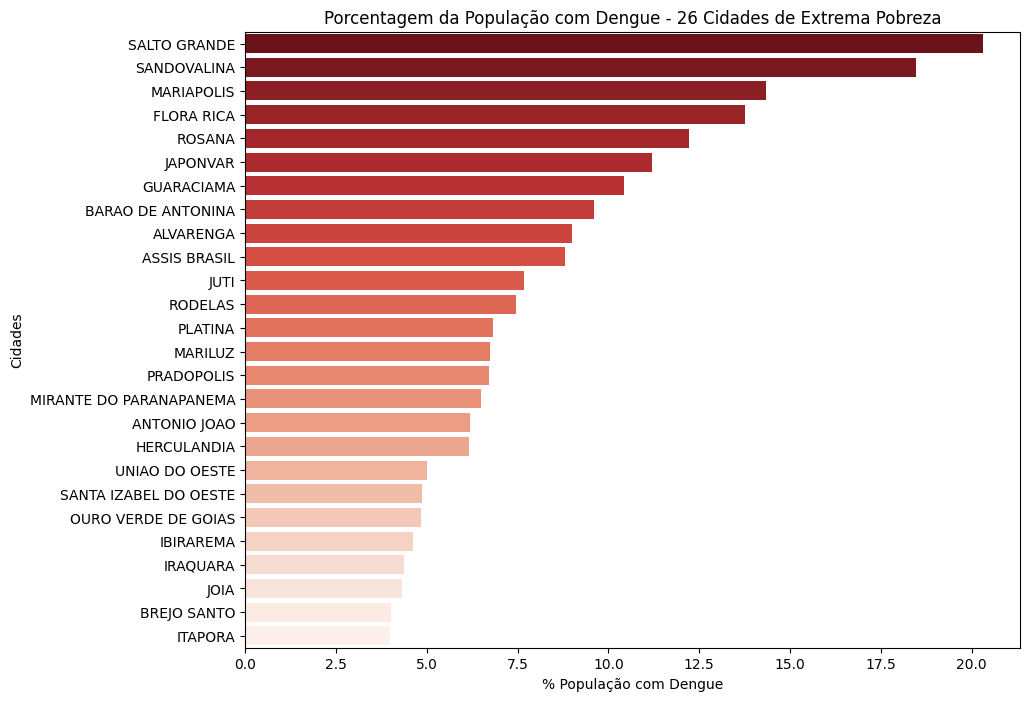

In [ ]:
pobreza_com_casos_top26 = pobreza_com_casos.nlargest(26, '% População com Dengue')

colors = sns.color_palette("Reds", len(pobreza_com_casos_top26))[::-1]

# Gráfico para as cidades de extrema pobreza (top )
plt.figure(figsize=(10, 8))
sns.barplot(
    y=pobreza_com_casos_top26['Município'],
    x=pobreza_com_casos_top26['% População com Dengue'],
    palette=colors
)
plt.title('Porcentagem da População com Dengue - 26 Cidades de Extrema Pobreza')
plt.xlabel('% População com Dengue')
plt.ylabel('Cidades')
plt.show()

## Segunda Análise

O código abaixo calcula a média da porcentagem do número de casos de cada UF, relacionada somente as suas cidades de extrema pobreza. Após isso, faz o plot relacionando cada UF com a sua média, de forma crescente.

<ipython-input-269-df1e65b71ebe>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-269-df1e65b71ebe>:10: UserWarning: The palette list has more values (26) than needed (25), which may not be intended.
  sns.barplot(


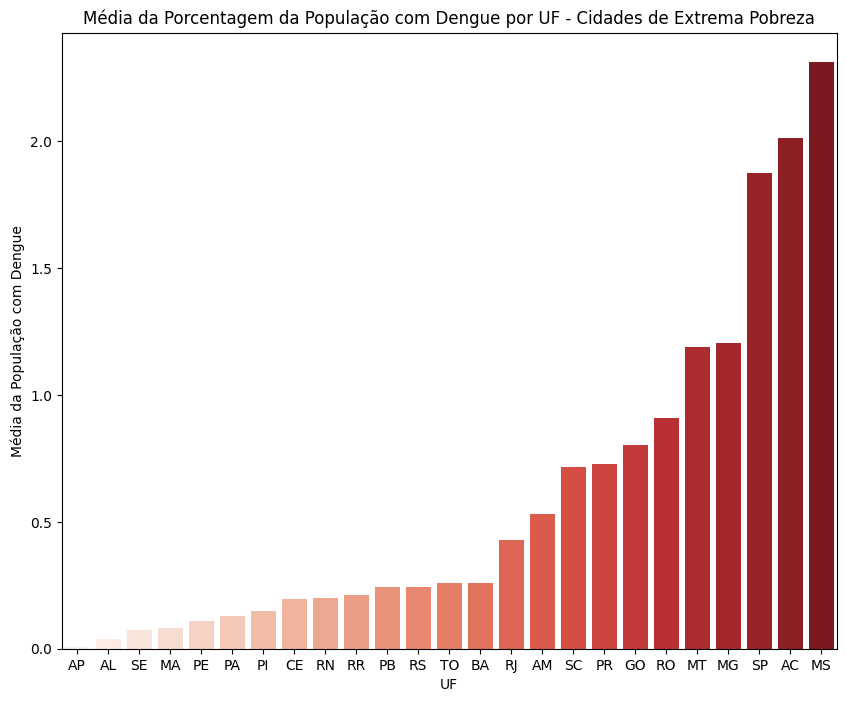

In [ ]:
# Calcular a média por UF para as cidades de extrema pobreza
media_por_uf_pobreza = pobreza_com_casos.groupby('UF')['% População com Dengue'].mean().reset_index()
media_por_uf_pobreza = media_por_uf_pobreza.sort_values('% População com Dengue')

colors = sns.color_palette("Reds", 26)

media_por_uf_pobreza = media_por_uf_pobreza.sort_values('% População com Dengue')
# Gráfico para a média por UF para as cidades de extrema pobreza
plt.figure(figsize=(10, 8))
sns.barplot(
    x=media_por_uf_pobreza['UF'],
    y=media_por_uf_pobreza['% População com Dengue'],
    palette=colors
)
plt.title('Média da Porcentagem da População com Dengue por UF - Cidades de Extrema Pobreza')
plt.xlabel('UF')
plt.ylabel('Média da População com Dengue')
plt.show()

## Teste de Hipótese

 - **Hipótese Nula** (H0): Há diferença significativa entre as duas populações.

 - **Hipótese Alternativa** (H1): Não há diferença significativa entre as duas populações.

In [ ]:
# Dados das porcentagens de dengue nas capitais e cidades de extrema pobreza
capitais_porcentagem = capitais['% População com Dengue']
pobreza_porcentagem = pobreza_com_casos['% População com Dengue']

# Teste t para amostras independentes
stat, p_value = ttest_ind(capitais_porcentagem, pobreza_porcentagem)

# Resultados do teste
print(f'Estatística do teste: {stat}')
print(f'Valor p: {p_value}')

# Nível de significância
alpha = 0.05
if p_value < alpha:
    print('Rejeita-se a hipótese nula: Há diferença significativa entre as duas populações.')
else:
    print('Não se rejeita a hipótese nula: Não há diferença significativa entre as duas populações.')

Estatística do teste: 1.0488114599879224
Valor p: 0.2944661910573587
Não se rejeita a hipótese nula: Não há diferença significativa entre as duas populações.


### Resultado

De acordo com os dados coletados, não é possível rejeitar a hipótese nula, ou seja, não há diferença significativa entre as duas populações.

## Teste de Hipótese

 - **Hipótese Nula** (H0): Não há diferença significativa na porcentagem de população com dengue entre as capitais e as cidades de extrema pobreza. (As médias são iguais)
 - **Hipótese Alternativa** (H1): Há uma diferença significativa na porcentagem de população com dengue entre as capitais e as cidades de extrema pobreza. (As médias são diferentes)

In [ ]:
def bootstrap_mean_diff(data1, data2, n_sub=1000):
    size1 = len(data1)
    size2 = len(data2)
    values = np.zeros(n_sub)

    for i in range(n_sub):
        sample1 = data1.sample(size1, replace=True)
        sample2 = data2.sample(size2, replace=True)

        # Calcular a média das amostras
        mean1 = sample1.mean()
        mean2 = sample2.mean()
        diff = mean1 - mean2
        values[i] = diff

    # Gerar valores inferior e superior para um nível de confiança de 95%
    LI = np.percentile(values, 2.5)
    LS = np.percentile(values, 97.5)
    return values, LI, LS

capitais['% População com Dengue'] = capitais['% População com Dengue'].astype(float)
pobreza_com_casos['% População com Dengue'] = pobreza_com_casos['% População com Dengue'].astype(float)

# Executar o bootstrap
diff_values, LI, LS = bootstrap_mean_diff(capitais['% População com Dengue'], pobreza_com_casos['% População com Dengue'])

# Teste da Hipótese
if LI > 0:
    print(f"Com 95% de confiança, rejeitamos a hipótese nula. A porcentagem de população com dengue é significativamente maior nas capitais do que nas cidades de extrema pobreza.")
else:
    print(f"Com 95% de confiança, não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a porcentagem de população com dengue é significativamente maior nas capitais do que nas cidades de extrema pobreza.")

print(f"Intervalo de Confiança de 95% para a diferença de médias: ({LI}, {LS})")


Com 95% de confiança, não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a porcentagem de população com dengue é significativamente maior nas capitais do que nas cidades de extrema pobreza.
Intervalo de Confiança de 95% para a diferença de médias: (-0.20100421221601866, 1.1251498343071635)


### Resultado

Com 95% de confiança, não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a porcentagem de população com dengue é significativamente maior nas capitais do que nas cidades de extrema pobreza.

Intervalo de Confiança de 95% para a diferença de médias (aproximados): [-0.2047, 1.1693]

## Portes das Cidades e Preparação dos Dados

As análises acima foram feitas relacionando as capitais e as cidades de extrema pobreza. Os testes abaixo vão levar em conta a coluna "Porte", que apresenta diversos portes de cada cidade cadastrada. Sendo assim, segue abaixo a análise exploratória dos dados.

## Distribuição dos casos prováveis de dengue

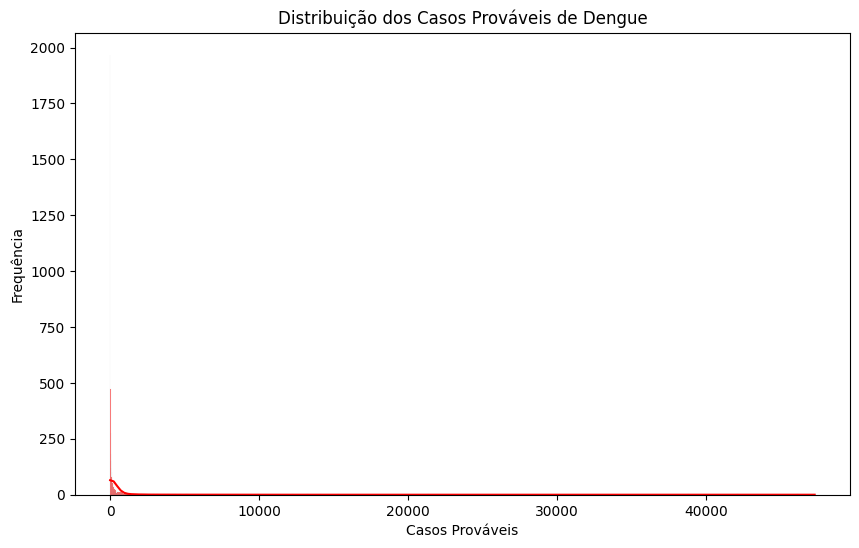

In [ ]:
# Distribuição dos casos prováveis de dengue
plt.figure(figsize=(10, 6))
sns.histplot(municipios_casos['Casos Prováveis'], kde=True, color='red')
plt.title('Distribuição dos Casos Prováveis de Dengue')
plt.xlabel('Casos Prováveis')
plt.ylabel('Frequência')
plt.show()

## Distribuição da proporção de casos por 100 habitantes

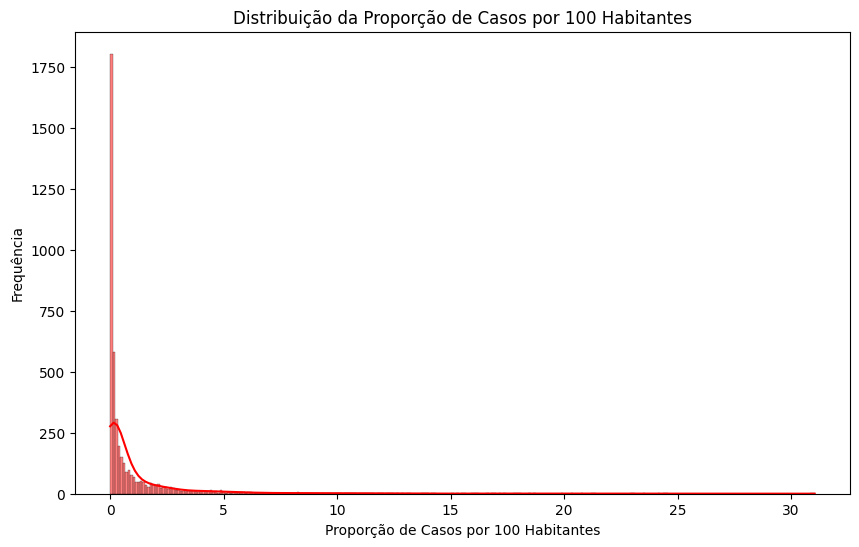

In [ ]:
# Distribuição da proporção de casos por 100 habitantes
plt.figure(figsize=(10, 6))
sns.histplot(municipios_casos['Proporcao de Casos por 100 Habitantes'], kde=True, color='red')
plt.title('Distribuição da Proporção de Casos por 100 Habitantes')
plt.xlabel('Proporção de Casos por 100 Habitantes')
plt.ylabel('Frequência')
plt.show()

## Casos Prováveis por Porte

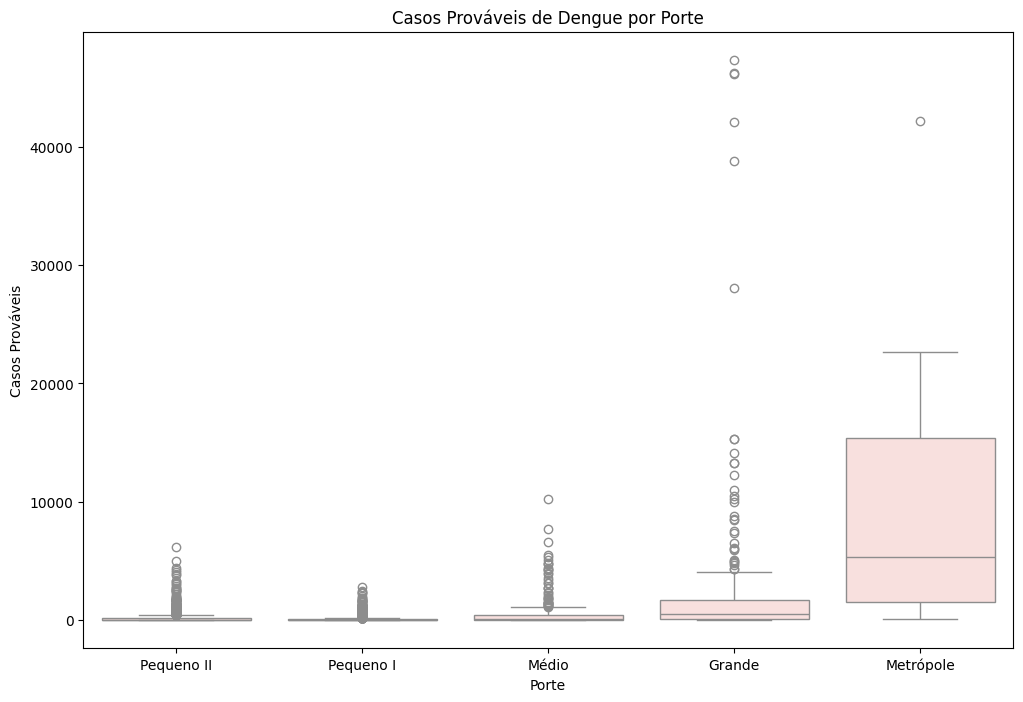

In [ ]:
# Ordenar os portes
ordenar_portes = ['Pequeno II', 'Pequeno I', 'Médio', 'Grande', 'Metrópole']

# Distribuição dos dados por Porte (Casos Prováveis)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Porte', y='Casos Prováveis', data=municipios_casos, order=ordenar_portes)
plt.title('Casos Prováveis de Dengue por Porte')
plt.xlabel('Porte')
plt.ylabel('Casos Prováveis')
plt.show()

## Proporção de Casos por 100 Habitantes por Porte

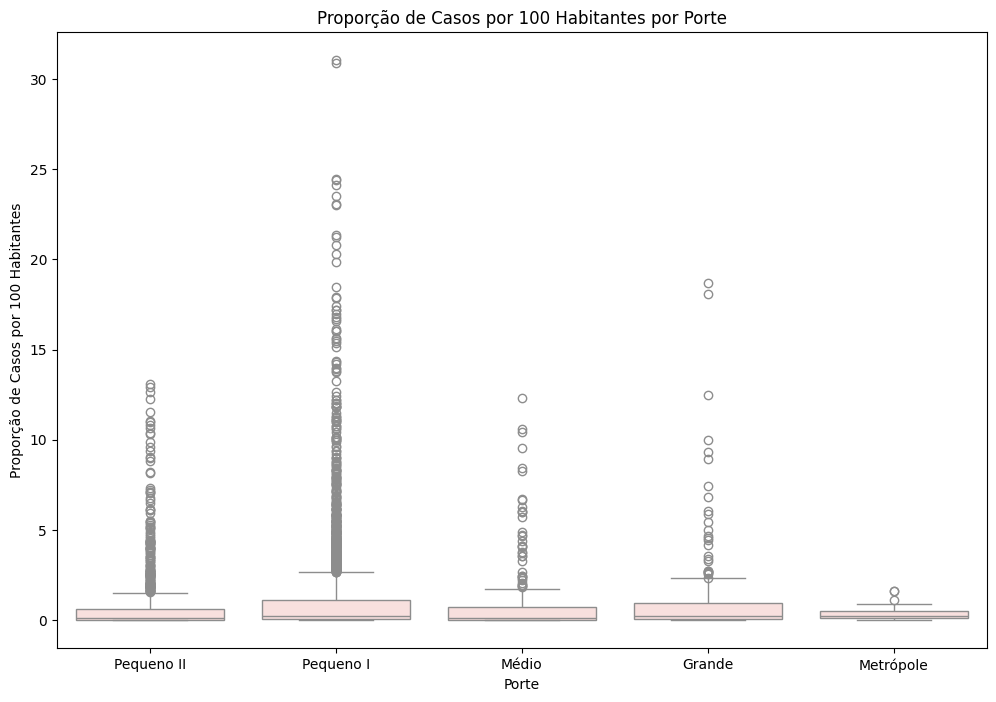

In [ ]:
# Distribuição dos dados por Porte (Proporção de Casos por 100 Habitantes)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Porte', y='Proporcao de Casos por 100 Habitantes', data=municipios_casos, order=ordenar_portes)
plt.title('Proporção de Casos por 100 Habitantes por Porte')
plt.xlabel('Porte')
plt.ylabel('Proporção de Casos por 100 Habitantes')
plt.show()

## Teste de Hipótese

- **Hipótese Nula** (H0): Não há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.

- **Hipótese Alternativa** (H1): Há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.

In [ ]:
# Filtrar os dados para cada grupo de Porte
pequeno_ii = municipios_casos[municipios_casos['Porte'] == 'Pequeno II']['Proporcao de Casos por 100 Habitantes']
pequeno_i = municipios_casos[municipios_casos['Porte'] == 'Pequeno I']['Proporcao de Casos por 100 Habitantes']
medio = municipios_casos[municipios_casos['Porte'] == 'Médio']['Proporcao de Casos por 100 Habitantes']
grande = municipios_casos[municipios_casos['Porte'] == 'Grande']['Proporcao de Casos por 100 Habitantes']
metropole = municipios_casos[municipios_casos['Porte'] == 'Metrópole']['Proporcao de Casos por 100 Habitantes']

# Número de reamostragens
n_bootstraps = 10000

# Inicializar dicionários para armazenar os resultados
bootstrap_diffs = {}
ci_lower = {}
ci_upper = {}
diff_mean = {}

# Função para calcular a diferença de médias bootstrap entre dois grupos
def bootstrap_diff(group1, group2):
    diffs = []
    for _ in range(n_bootstraps):
        sample1 = group1.sample(n=len(group1), replace=True)
        sample2 = group2.sample(n=len(group2), replace=True)
        diff = sample1.mean() - sample2.mean()
        diffs.append(diff)
    return np.array(diffs)

# Comparar cada grupo com todos os outros, evitando duplicatas
groups = {
    'Pequeno II': pequeno_ii,
    'Pequeno I': pequeno_i,
    'Médio': medio,
    'Grande': grande,
    'Metrópole': metropole
}

# Inicializar um dicionário para armazenar os resultados das hipóteses
hypothesis_results = {}

# Manter um conjunto de comparações já processadas
processed_comparisons = set()

for group1_name, group1_data in groups.items():
    for group2_name, group2_data in groups.items():
        if group1_name != group2_name and (group2_name, group1_name) not in processed_comparisons:
            key = f'{group1_name} vs {group2_name}'
            processed_comparisons.add((group1_name, group2_name))
            bootstrap_diffs[key] = bootstrap_diff(group1_data, group2_data)
            ci_lower[key] = np.percentile(bootstrap_diffs[key], 2.5)
            ci_upper[key] = np.percentile(bootstrap_diffs[key], 97.5)
            diff_mean[key] = np.mean(bootstrap_diffs[key])

            # Determinar se rejeitamos a hipótese nula
            if ci_lower[key] > 0 or ci_upper[key] < 0:
                hypothesis_results[key] = 'Com 95% de confiança, rejeitamos a hipótese nula - Há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.'
            else:
                hypothesis_results[key] = 'Com 95% de confiança, aceitamos a hipótese nula - Não há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.'

# Exibir os resultados das hipóteses
for comparison, result in hypothesis_results.items():
    print(f'{comparison}: {result}')

Pequeno II vs Pequeno I: Com 95% de confiança, rejeitamos a hipótese nula - Há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.
Pequeno II vs Médio: Com 95% de confiança, aceitamos a hipótese nula - Não há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.
Pequeno II vs Grande: Com 95% de confiança, aceitamos a hipótese nula - Não há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.
Pequeno II vs Metrópole: Com 95% de confiança, rejeitamos a hipótese nula - Há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) entre os diferentes portes de municípios.
Pequeno I vs Médio: Com 95% de confiança, rejeitamos a hipótese nula - Há diferença significativa na incidência de dengue (Proporção de Casos por 100 Habitantes) ent

### Resultado

Foram feitos bootstap com cada

## Modelos de Machine Learning

### Classificação

O código abaixo implementa 4 diferentes modelos de classificação: regressão logística, árvore de decisão, random forest e KNN. O objetivo é fazer o modelo classificar o porte das cidades com base no número de casos prováveis e na porcentagem de caso.

In [ ]:
# Dividir os dados em treino e teste
X = municipios_casos[['Casos Prováveis', 'Proporcao de Casos por 100 Habitantes']]
y = municipios_casos['Porte']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar e avaliar modelos de classificação
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(confusion_matrix(y_test, y_pred))
    print('\n')

Model: Logistic Regression
              precision    recall  f1-score   support

      Grande       0.88      0.28      0.42        50
   Metrópole       1.00      0.50      0.67         2
       Médio       0.60      0.09      0.16        66
   Pequeno I       0.71      1.00      0.83       586
  Pequeno II       0.60      0.17      0.26       203

    accuracy                           0.71       907
   macro avg       0.76      0.41      0.47       907
weighted avg       0.69      0.71      0.63       907

[[ 14   0   4  22  10]
 [  1   1   0   0   0]
 [  1   0   6  46  13]
 [  0   0   0 586   0]
 [  0   0   0 169  34]]


Model: Decision Tree
              precision    recall  f1-score   support

      Grande       0.84      0.86      0.85        50
   Metrópole       1.00      0.50      0.67         2
       Médio       0.74      0.80      0.77        66
   Pequeno I       0.97      0.98      0.97       586
  Pequeno II       0.90      0.86      0.88       203

    accuracy       

### Resultado

De acordo com o código apresentado, é possível concluir, com relação a cada modelo:

 - Regressão Logistica: possui uma boa acurácia, ou seja, consegue acertar bem as classes
 - Árvore de Decisão: possui a acurácia próxima da máxima, ou seja, acertou a grande maioria das classificações.
 - Random Forest: possui a acurácia próxima da máxima e a melhor acurácia entre os modelos implementados.

### Regressão

O objetivo do código abaixo é analisar a relação entre a população de um município e a proporção de casos prováveis de dengue, utilizando técnicas de regressão. A análise busca entender como o tamanho da população pode influenciar a incidência de dengue em termos de proporção de casos por 100 habitantes.

In [ ]:
# Dividir os dados em treino e teste para regressão
X = municipios_casos[['População 2010']]
y = municipios_casos['Proporcao de Casos por 100 Habitantes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar e avaliar modelos de regressão
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print('R²:', r2_score(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('\n')


Model: Linear Regression
R²: 2.7547184659471036e-05
MSE: 5.386547089868635
MAE: 1.3545518692860623


Model: Ridge Regression
R²: 2.7547184659471036e-05
MSE: 5.386547089868635
MAE: 1.3545518692860623


Model: Lasso Regression
R²: 2.7545854249688695e-05
MSE: 5.386547097035148
MAE: 1.354551856251953




### Resultado

Segue abaixo a discussão dos resultados obtidos com o código acima:

 - Regressão Linear: O valor de R² próximo de zero indica que o modelo praticamente não explica a variância na proporção de casos de dengue. Isso sugere que a população de 2010 não é um bom preditor da proporção de casos de dengue. O erro quadrático médio é relativamente alto, indicando que a média dos quadrados dos erros entre os valores previstos e os valores reais é considerável. O erro absoluto médio indica que, em média, as previsões do modelo estão afastadas dos valores reais por aproximadamente 1.35 unidades. Considerando a métrica de proporção de casos por 100 habitantes, isso representa um erro significativo.

 - Regressão Ridge: O valor de R² é idêntico ao do modelo de regressão linear, indicando que a penalização dos coeficientes não trouxe melhorias no poder preditivo do modelo. O MSE é exatamente o mesmo do modelo de regressão linear, confirmando que a inclusão da penalização L2 não teve efeito na previsão. O MAE também é idêntico ao da regressão linear, reforçando que a adição de uma penalização L2 não melhorou a precisão das previsões.

 - Regressão Lasso: O valor de R² é ligeiramente diferente, mas ainda próximo de zero, indicando novamente que a proporção de variação explicada pelo modelo é insignificante. O MSE é praticamente o mesmo dos outros modelos, mostrando que a penalização L1 não trouxe melhorias significativas. O MAE é praticamente o mesmo dos outros modelos, o que indica que a penalização L1 também não melhorou a precisão das previsões.

Nesse sentido, os resultados indicam que nenhum dos modelos de regressão utilizados (Linear, Ridge, Lasso) consegue prever a proporção de casos prováveis de dengue de forma eficaz com base apenas na população dos municípios. Todos os modelos apresentam valores de R² próximos de zero, MSE elevados e MAE significativos, sugerindo que o tamanho da população não é um bom preditor para a proporção de casos de dengue.


# ***4 - Existe alguma correlação entre fatores ambientais, como temperatura e pluviosidade, e o aumento dos casos de dengue? Como esses fatores podem estar relacionados à propagação da doença?***

## Análise Exploratória e Tratamento dos Dados

A análise exploratória dos dados abaixo envolve uma série de etapas para entender e preparar o conjunto de dados de precipitação mensal. Inicialmente, carregamos um arquivo Excel contendo informações de precipitação mensal para vários municípios brasileiros, abrangendo todas as unidades federativas (UFs) do país. O arquivo foi lido e suas colunas renomeadas para facilitar a compreensão e manipulação dos dados, utilizando os nomes dos meses.

Cada mês possui três colunas de dados, correspondendo a diferentes medidas ou observações de precipitação. Para cada mês, calculamos a média dessas três colunas, criando uma nova coluna que representa a média mensal de precipitação para aquele mês. Essas médias mensais são então usadas para calcular uma média anual de precipitação para cada município.

Durante o processo, as colunas de dados de precipitação são limpas e convertidas para o formato numérico, tratando qualquer erro de conversão como NaN (Not a Number). Linhas onde todas as colunas mensais de média são NaN são eliminadas para garantir que estamos trabalhando com dados válidos.

Adicionalmente, a coluna "UF" é normalizada, removendo espaços em branco e convertendo todos os valores para letras maiúsculas. Utilizamos um dicionário **`uf_regiao`** para mapear cada UF para sua respectiva região geográfica do Brasil, adicionando uma nova coluna "Região" ao DataFrame. Este mapeamento nos permite agregar e analisar os dados por região, facilitando comparações e insights regionais.

Após essas etapas de limpeza e preparação, verificamos se ainda existem valores NaN na coluna "Região". Se encontrados, esses valores são destacados para identificação de possíveis problemas nos dados originais ou no mapeamento de regiões.

Por fim, selecionamos as colunas desejadas, incluindo os códigos dos municípios, nomes, UFs, regiões e todas as colunas de médias mensais e anual de precipitação. O DataFrame resultante é salvo em um novo arquivo Excel, tornando-o pronto para análises posteriores.

A análise exploratória deste conjunto de dados nos permite ter uma visão clara da distribuição de precipitação ao longo do ano em diferentes municípios e regiões do Brasil. A partir desse ponto, podemos realizar análises mais aprofundadas, como a identificação de padrões sazonais, comparações regionais de precipitação e possíveis correlações com outros fatores climáticos ou socioeconômicos.

In [ ]:
# Dicionário de UFs e suas regiões correspondentes
uf_regiao = {
    'AC': 'Região Norte', 'AL': 'Região Nordeste', 'AM': 'Região Norte', 'AP': 'Região Norte', 'BA': 'Região Nordeste',
    'CE': 'Região Nordeste', 'DF': 'Região Centro-Oeste', 'ES': 'Região Sudeste', 'GO': 'Região Centro-Oeste',
    'MA': 'Região Nordeste', 'MG': 'Região Sudeste', 'MS': 'Região Centro-Oeste', 'MT': 'Região Centro-Oeste',
    'PA': 'Região Norte', 'PB': 'Região Nordeste', 'PE': 'Região Nordeste', 'PI': 'Região Nordeste', 'PR': 'Região Sul',
    'RJ': 'Região Sudeste', 'RN': 'Região Nordeste', 'RO': 'Região Norte', 'RR': 'Região Norte', 'RS': 'Região Sul',
    'SC': 'Região Sul', 'SE': 'Região Nordeste', 'SP': 'Região Sudeste', 'TO': 'Região Norte'
}

# Carregar o arquivo xlsx
df = pd.read_excel('https://drive.google.com/uc?export=download&id=1st713_3kxAMQcV2Fj5JpMfPXLnchJDFQ')

# Renomear colunas de maneira compreensível
meses = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO']
new_columns = ['Código', 'Município', 'UF']

for mes in meses:
    new_columns.extend([f'{mes}_1', f'{mes}_2', f'{mes}_3'])

df.columns = new_columns

# Função para limpar e converter colunas para float
def clean_and_convert(col):
    return pd.to_numeric(col, errors='coerce')

# Calcular a média para cada mês
for mes in meses:
    colunas_mes = [f'{mes}_1', f'{mes}_2', f'{mes}_3']
    df[mes + '_MEDIA'] = df[colunas_mes].apply(clean_and_convert).mean(axis=1)

# Calcular a média anual de todos os meses
df['MEDIA_ANUAL'] = df[[mes + '_MEDIA' for mes in meses]].mean(axis=1)

# Eliminar linhas que estão completamente com NaN na parte de médias mensais
df = df.dropna(subset=[mes + '_MEDIA' for mes in meses], how='all')

# Normalizar a coluna "UF" no DataFrame principal
df['UF'] = df['UF'].str.strip().str.upper()

# Adicionar a coluna "Região" com base no dicionário uf_regiao
df['Região'] = df['UF'].map(uf_regiao)

# Verificar se ainda existem NaNs na coluna "Região"
nan_regioes = df[df['Região'].isna()]
if not nan_regioes.empty:
    print("Linhas com NaN na coluna 'Região':")
    print(nan_regioes[['Código', 'Município', 'UF']])

# Selecionar colunas desejadas
pluv_media = df[['Código', 'Município', 'UF', 'Região'] + [mes + '_MEDIA' for mes in meses] + ['MEDIA_ANUAL']]

# Salvar o novo DataFrame em um arquivo Excel
pluv_media.to_excel('filtered_dataset_with_regiao.xlsx', index=False)

pluv_media.dropna()
pluv_media.head()


,Código,Município,UF,Região,JANEIRO_MEDIA,FEVEREIRO_MEDIA,MARÇO_MEDIA,ABRIL_MEDIA,MAIO_MEDIA,JUNHO_MEDIA,JULHO_MEDIA,AGOSTO_MEDIA,SETEMBRO_MEDIA,OUTUBRO_MEDIA,NOVEMBRO_MEDIA,DEZEMBRO_MEDIA,MEDIA_ANUAL
1,82989.0,AGUA BRANCA,AL,Região Nordeste,16.166667,NaN,28.133333,26.666667,43.833333,53.166667,56.100000,31.733333,16.933333,11.800000,9.400000,13.266667,27.927273
2,83249.0,ALAGOINHAS,BA,Região Nordeste,18.600000,20.033333,21.633333,40.466667,52.466667,48.100000,36.766667,30.533333,22.133333,17.100000,20.066667,17.733333,28.802778
3,82353.0,ALTAMIRA,PA,Região Norte,95.300000,110.066667,133.166667,121.866667,77.433333,34.333333,NaN,11.433333,15.666667,20.433333,31.766667,54.733333,64.200000
4,83007.0,ALTO DA BOA VISTA,RJ,Região Sudeste,76.233333,59.266667,84.033333,67.033333,60.266667,50.500000,59.933333,50.166667,73.166667,64.900000,79.666667,78.933333,67.008333
5,82970.0,ALTO PARNAIBA,MA,Região Nordeste,77.000000,65.233333,80.533333,42.766667,13.566667,0.766667,0.133333,0.700000,4.700000,24.966667,53.966667,60.500000,35.402778


## Nova Tabela

O código abaixo importa uma nova tabela, com os dados de temperatura média mensal e anual de cada cidade registrada nessa base de dados. Aleḿ disso, cada cidade possui a sua respectiva UF e o código do IBGE.

In [ ]:
temp_media = pd.read_excel("https://drive.google.com/uc?export=download&id=1a3n1-T1KsWlg8vomnW8YjOzJonmj6R4t")
temp_media.head()

,Código,Município,UF,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano
0,83249,ALAGOINHAS,BA,26.4,26.4,26.5,25.5,24.2,22.9,22,22,23,24.3,25.5,26.2,24.6
1,82970,ALTO PARNAIBA,MA,26,25.9,26.1,26.3,26.1,25,24.7,25.8,27.9,28.3,27.1,26.4,26.3
2,83096,ARACAJU,SE,27.3,27.5,27.7,27.3,26.5,25.6,24.9,24.9,25.4,26.2,26.7,27.1,26.4
3,83442,ARACUAI,MG,26.7,27.2,26.7,25.7,23.8,22.5,22.2,23.5,25.5,26.9,26.1,26.2,25.3
4,83368,ARAGARCAS,GO,26.2,26.2,26.3,26.4,24.8,23.6,23.4,25.7,28,28.3,26.8,26.3,26


## Tratamento dos Dados

No código abaixo, realizamos a conversão das colunas de temperatura e pluviosidade para valores numéricos, tratando os erros de conversão como NaN. A função convert_to_numeric é definida para realizar essa conversão em um DataFrame específico para as colunas listadas.

In [ ]:
# Função para converter colunas para numéricas, forçando erros a NaN
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Lista de colunas de temperatura e pluviosidade
temp_columns = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro", "Ano"]
pluv_columns = ["JANEIRO_MEDIA", "FEVEREIRO_MEDIA", "MARÇO_MEDIA", "ABRIL_MEDIA", "MAIO_MEDIA", "JUNHO_MEDIA", "JULHO_MEDIA", "AGOSTO_MEDIA", "SETEMBRO_MEDIA", "OUTUBRO_MEDIA", "NOVEMBRO_MEDIA", "DEZEMBRO_MEDIA", "MEDIA_ANUAL"]

# Converter colunas de temperatura e pluviosidade para numéricas
temp_media = convert_to_numeric(temp_media, temp_columns)
pluv_media = convert_to_numeric(pluv_media, pluv_columns)

<ipython-input-281-e6fb81323992>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# Função para limpar a pontuação e converter para maiúsculas
def clean_text(text):
    if pd.notnull(text):
        text = text.upper()
        text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Aplicar a função de limpeza às colunas relevantes
municipios_casos['Município'] = municipios_casos['Município'].apply(clean_text)
pluv_media['Município'] = pluv_media['Município'].apply(clean_text)

# Realizar o merge usando o nome do município
pluv_media = pluv_media.merge(municipios_casos[['Município', 'Casos Prováveis', 'População 2010']], on='Município', how='left', suffixes=('_pluv', '_municipios'))

# Limpar dados nulos após o merge
pluv_media.dropna(inplace=True)

# Exibir as primeiras linhas para verificar os resultados
pluv_media

<ipython-input-282-5eeeade81bf8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluv_media['Município'] = pluv_media['Município'].apply(clean_text)


,Código,Município,UF,Região,JANEIRO_MEDIA,FEVEREIRO_MEDIA,MARÇO_MEDIA,ABRIL_MEDIA,MAIO_MEDIA,JUNHO_MEDIA,JULHO_MEDIA,AGOSTO_MEDIA,SETEMBRO_MEDIA,OUTUBRO_MEDIA,NOVEMBRO_MEDIA,DEZEMBRO_MEDIA,MEDIA_ANUAL,Casos Prováveis,População 2010
1,83249.0,ALAGOINHAS,BA,Região Nordeste,18.600000,20.033333,21.633333,40.466667,52.466667,48.100000,36.766667,30.533333,22.133333,17.100000,20.066667,17.733333,28.802778,671.0,141949.0
5,83096.0,ARACAJU,SE,Região Nordeste,14.366667,22.233333,24.400000,51.333333,75.633333,66.133333,49.866667,32.433333,20.633333,18.666667,12.600000,7.966667,33.022222,1474.0,571149.0
12,83384.0,ARINOS,MG,Região Sudeste,61.033333,46.966667,59.566667,21.733333,5.300000,0.966667,0.066667,1.633333,3.900000,22.366667,66.866667,78.200000,30.716667,160.0,17674.0
14,82460.0,BACABAL,MA,Região Nordeste,84.433333,100.433333,122.566667,114.966667,64.100000,17.000000,6.300000,3.866667,3.300000,9.033333,22.866667,41.433333,49.191667,85.0,100014.0
16,82768.0,BALSAS,MA,Região Nordeste,75.600000,60.533333,62.033333,39.600000,16.666667,1.566667,0.533333,0.466667,5.900000,28.000000,50.600000,57.133333,33.219444,80.0,83528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,83948.0,TORRES,RS,Região Sul,56.166667,56.233333,50.866667,36.000000,40.366667,34.333333,40.133333,41.933333,46.066667,48.133333,37.766667,39.000000,43.916667,19.0,34656.0
236,82145.0,TRACUATEUA,PA,Região Norte,89.466667,128.433333,149.833333,136.533333,113.933333,69.766667,63.966667,25.400000,5.566667,3.466667,4.100000,18.700000,67.430556,10.0,27455.0
239,83577.0,UBERABA,MG,Região Sudeste,109.400000,76.066667,80.433333,31.633333,16.533333,7.100000,3.166667,4.833333,17.700000,43.633333,67.800000,94.100000,46.033333,6043.0,295988.0
241,83927.0,URUGUAIANA,RS,Região Sul,43.200000,49.366667,51.400000,52.700000,39.933333,28.133333,22.333333,20.300000,29.133333,57.166667,40.500000,51.900000,40.505556,39.0,125435.0


In [ ]:
# Função para limpar a pontuação e converter para maiúsculas
def clean_text(text):
    if pd.notnull(text):
        text = text.upper()
        text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Aplicar a função de limpeza às colunas relevantes
municipios_casos['Município'] = municipios_casos['Município'].apply(clean_text)
temp_media['Município'] = temp_media['Município'].apply(clean_text)

# Realizar o merge usando o nome do município
temp_media = temp_media.merge(municipios_casos[['Município', 'Casos Prováveis', 'População 2010']], on='Município', how='left', suffixes=('_temp', '_municipios'))

# Limpar dados nulos após o merge
temp_media.dropna(inplace=True)

# Exibir as primeiras linhas para verificar os resultados
temp_media

,Código,Município,UF,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Ano,Casos Prováveis,População 2010
0,83249,ALAGOINHAS,BA,26.4,26.4,26.5,25.5,24.2,22.9,22.0,22.0,23.0,24.3,25.5,26.2,24.6,671.0,141949.0
2,83096,ARACAJU,SE,27.3,27.5,27.7,27.3,26.5,25.6,24.9,24.9,25.4,26.2,26.7,27.1,26.4,1474.0,571149.0
8,83384,ARINOS,MG,26.0,26.2,25.8,25.4,23.6,22.2,22.1,23.8,26.4,27.5,25.9,25.7,25.1,160.0,17674.0
13,82784,BARBALHA,CE,26.2,25.6,25.4,25.2,25.0,24.7,24.6,25.5,26.8,27.8,27.8,27.3,26.0,23.0,55323.0
14,82113,BARCELOS,AM,27.1,27.0,26.8,26.5,26.3,26.2,26.3,26.8,27.1,27.3,27.2,27.3,26.8,17.0,25718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,82797,SURUBIM,PE,25.3,25.6,25.6,25.2,24.1,22.7,21.9,22.0,22.9,24.1,24.9,25.3,24.1,5.0,58515.0
140,83235,TAGUATINGA,TO,25.3,25.1,25.3,25.8,25.7,24.9,24.8,26.2,28.0,28.0,25.9,25.6,25.9,10.0,15051.0
141,83948,TORRES,RS,23.9,24.0,23.3,21.1,17.9,15.4,14.3,15.5,16.9,19.1,20.7,22.7,19.6,19.0,34656.0
145,83577,UBERABA,MG,23.8,23.9,23.6,22.6,20.0,19.0,19.1,21.1,23.2,24.2,23.8,23.8,22.3,6043.0,295988.0


## Cálculo da Correlação

O código abaixo se propõe a fazer o cálculo da correlação entre a pluviosidade e os casos de dengue, e entre a temperatura e os casos de dengue.

In [ ]:
# Merge dos DataFrames baseados na coluna de código (ou outra chave comum)
merged_data = pd.merge(pluv_media[['MEDIA_ANUAL', 'Casos Prováveis']],
                       temp_media[['Ano', 'Casos Prováveis']],
                       on='Casos Prováveis',
                       suffixes=('_pluv', '_temp'))

# Cálculo do coeficiente de correlação de Pearson para pluviosidade
corr_pluv, p_value_pluv = pearsonr(merged_data['MEDIA_ANUAL'], merged_data['Casos Prováveis'])

# Cálculo do coeficiente de correlação de Pearson para temperatura
corr_temp, p_value_temp = pearsonr(merged_data['Ano'], merged_data['Casos Prováveis'])

# Exibir resultados
print(f"Correlação entre pluviosidade e casos de dengue: {corr_pluv:.4f}, p-valor: {p_value_pluv:.4f}")
print(f"Correlação entre temperatura e casos de dengue: {corr_temp:.4f}, p-valor: {p_value_temp:.4f}")

Correlação entre pluviosidade e casos de dengue: 0.0025, p-valor: 0.9788
Correlação entre temperatura e casos de dengue: -0.0641, p-valor: 0.4998


### Resultado

 - Correlação entre **pluviosidade** e **casos de dengue**: 0.0025, p-valor: 0.9788
 - Correlação entre **temperatura** e **casos de dengue**: -0.0641, p-valor: 0.4998

Nesse sentido, podemos interpretar os resultados das correlações da seguinte forma:

 - **Pluviosidade e casos de dengue**: um coeficiente de correlação muito próximo de zero indica que não há uma relação linear significativa entre a pluviosidade e os casos de dengue. Além disso, possui um p-valor muito alto (maior que 0.05) indica que a correlação observada não é estatisticamente significativa. Isso sugere que qualquer relação observada entre pluviosidade e casos de dengue é provavelmente devida ao acaso.

 - **Temperatura e casos de dengue**: possui um coeficiente de correlação ligeiramente negativo, mas próximo de zero, sugere uma fraca e negativa relação linear entre a temperatura e os casos de dengue. No entanto, essa relação é muito fraca para ser considerada significativa. Novamente, um p-valor alto indica que a correlação não é estatisticamente significativa. Portanto, não podemos concluir que existe uma relação confiável entre a temperatura e os casos de dengue com base nos dados analisados.

Portanto os resultados indicam que, com base nos dados disponíveis, não há evidências estatisticamente significativas de uma correlação linear entre a pluviosidade ou a temperatura e os casos de dengue. Isso implica que outros fatores podem estar desempenhando um papel mais significativo na incidência de dengue, ou que as relações podem ser mais complexas e não capturadas por uma simples correlação linear.

## Primeira Análise

Este código realiza uma análise de regressão linear para investigar a relação entre a pluviosidade média anual e o percentual de casos de dengue em uma determinada região. Além disso, o código também imprime o MSE e o R² para avaliar a precisão do modelo de regressão.

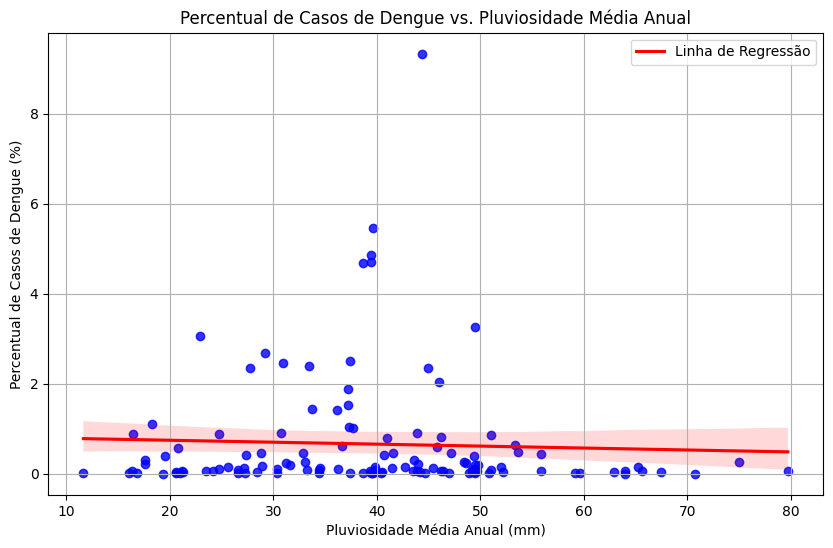

Mean Squared Error (MSE): 1.3209627522652994
R^2 Score: -0.0035364195750198224




In [ ]:
# Calcular o percentual de casos de dengue
pluv_media['Percentual_Casos'] = (pluv_media['Casos Prováveis'] / pluv_media['População 2010']) * 100

# Definir as variáveis independentes e dependentes
X = pluv_media[['MEDIA_ANUAL']]  # Variável independente (pluviosidade média anual)
y = pluv_media['Percentual_Casos']  # Variável dependente (percentual de casos de dengue)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Criar o gráfico com seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='MEDIA_ANUAL', y='Percentual_Casos', data=pluv_media, ci=95,
            scatter_kws={'color': 'blue'},  # Cor dos pontos
            line_kws={'color': 'red', 'label': 'Linha de Regressão'})  # Cor da linha de regressão
plt.title('Percentual de Casos de Dengue vs. Pluviosidade Média Anual')
plt.xlabel('Pluviosidade Média Anual (mm)')
plt.ylabel('Percentual de Casos de Dengue (%)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print('\n')

### Resultado

Um valor negativo de R², sugere que o modelo está se saindo pior do que uma linha horizontal que simplesmente representaria a média dos valores da variável dependente. Em outras palavras, o modelo não está capturando a relação entre a pluviosidade média anual e o percentual de casos de dengue de maneira eficaz.

O valor de MSE é baixo, o que incidca que os valores previstos e reais seja muito próximo. No entanto, dado o baixo R², podemos inferir que o modelo não está se ajustando bem aos dados.

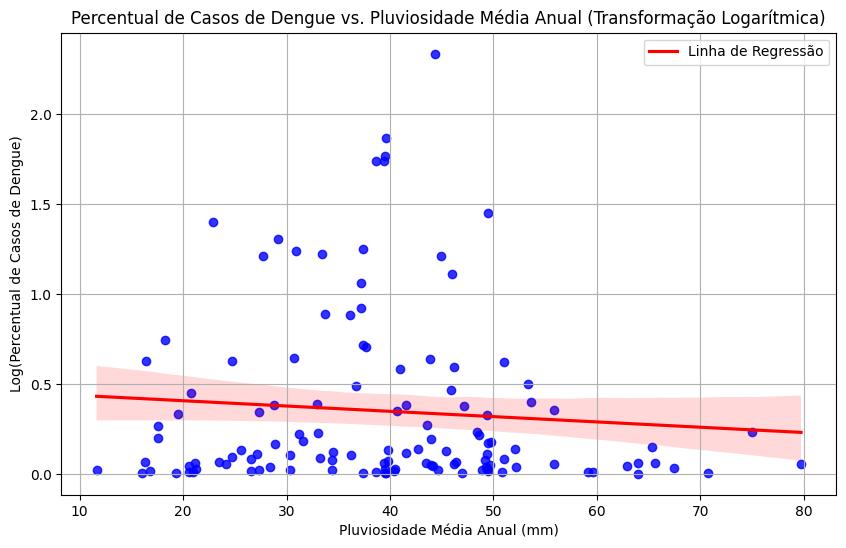

Mean Squared Error (MSE): 0.1995433057081714
R^2 Score: 0.015256880727925415




In [ ]:
# Calcular o percentual de casos de dengue
pluv_media['Percentual_Casos'] = (pluv_media['Casos Prováveis'] / pluv_media['População 2010']) * 100

# Aplicar a transformação logarítmica na variável dependente
pluv_media['Log_Percentual_Casos'] = np.log1p(pluv_media['Percentual_Casos'])

# Definir as variáveis independentes e dependentes
X = pluv_media[['MEDIA_ANUAL']]  # Variável independente (pluviosidade média anual)
y = pluv_media['Log_Percentual_Casos']  # Variável dependente transformada

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Criar o gráfico com seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='MEDIA_ANUAL', y='Log_Percentual_Casos', data=pluv_media, ci=95,
            scatter_kws={'color': 'blue'},  # Cor dos pontos
            line_kws={'color': 'red', 'label': 'Linha de Regressão'})  # Cor da linha de regressão
plt.title('Percentual de Casos de Dengue vs. Pluviosidade Média Anual (Transformação Logarítmica)')
plt.xlabel('Pluviosidade Média Anual (mm)')
plt.ylabel('Log(Percentual de Casos de Dengue)')
plt.legend()
plt.grid(True)
plt.show()
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print('\n')

### Resultado

O valor baixo de R² indica que a relação entre a pluviosidade média anual e o percentual de casos de dengue é muito fraca. A maior parte da variabilidade nos casos de dengue não está sendo explicada pela pluviosidade, sugerindo que outros fatores podem ser mais importantes na determinação da incidência de dengue.

O valor de MSE é baixo, o que incidca que os valores previstos e reais seja muito próximo. No entanto, dado o baixo R², podemos inferir que o modelo não está se ajustando bem aos dados.

## Segunda Análise

Abaixo foram criadas várias divisões com base nas estações do ano, que são bem definidas no Brasil. Nesse sentido, esses grupos foram utilizados para comparar como o número de casos se comporta em diferentes estações.



Analisando a estação: Verão


Mean Squared Error (MSE) para Verão: 2.2665759393089355
R^2 Score para Verão: -0.008033673558752286


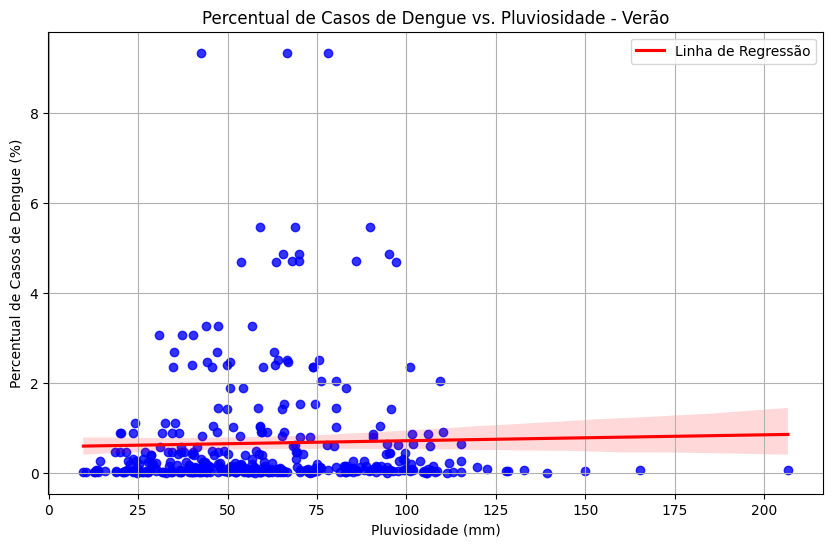



Analisando a estação: Outono


Mean Squared Error (MSE) para Outono: 2.1762018780003003
R^2 Score para Outono: 0.03215915450203777


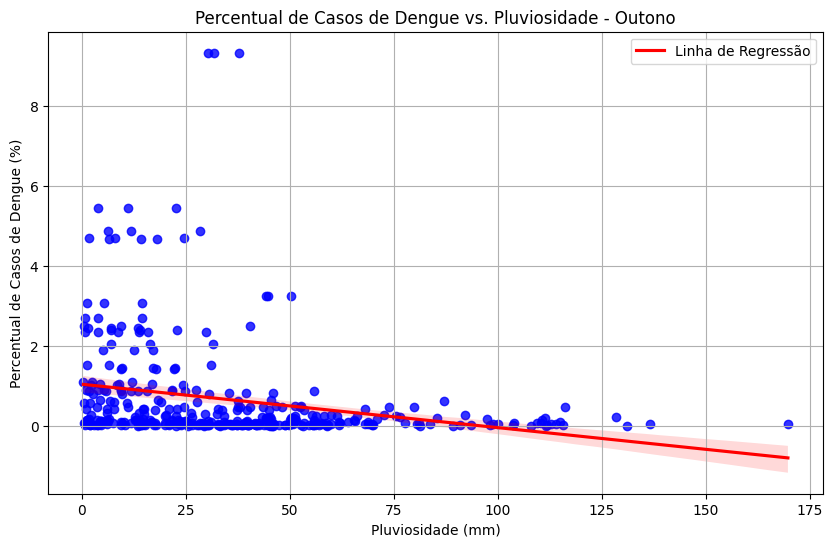



Analisando a estação: Inverno


Mean Squared Error (MSE) para Inverno: 2.195300105750295
R^2 Score para Inverno: 0.023665436580034727


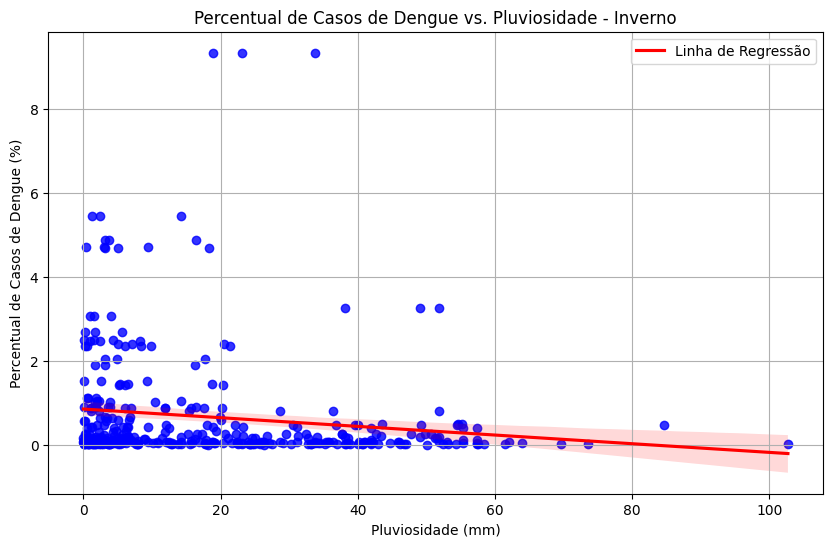



Analisando a estação: Primavera


Mean Squared Error (MSE) para Primavera: 2.164115767352957
R^2 Score para Primavera: 0.03753431370301008


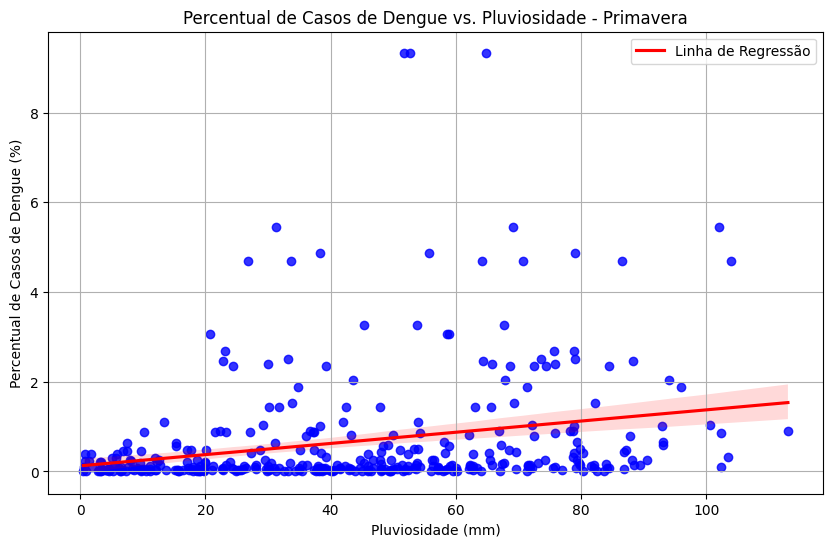

In [ ]:
# Adicionar variáveis para cada estação
def get_season(month):
    if month in ['JANEIRO_MEDIA', 'FEVEREIRO_MEDIA', 'MARÇO_MEDIA']:
        return 'Verão'
    elif month in ['ABRIL_MEDIA', 'MAIO_MEDIA', 'JUNHO_MEDIA']:
        return 'Outono'
    elif month in ['JULHO_MEDIA', 'AGOSTO_MEDIA', 'SETEMBRO_MEDIA']:
        return 'Inverno'
    elif month in ['OUTUBRO_MEDIA', 'NOVEMBRO_MEDIA', 'DEZEMBRO_MEDIA']:
        return 'Primavera'

# Criar um DataFrame para armazenar as médias sazonais
seasonal_data = pluv_media.copy()
seasonal_data['Estação'] = seasonal_data.apply(lambda row: get_season(row.name), axis=1)

# Preencher as colunas com a média mensal da estação
seasonal_data['Pluviosidade_Sazonal'] = seasonal_data[['JANEIRO_MEDIA', 'FEVEREIRO_MEDIA', 'MARÇO_MEDIA', 'ABRIL_MEDIA', 'MAIO_MEDIA', 'JUNHO_MEDIA', 'JULHO_MEDIA', 'AGOSTO_MEDIA', 'SETEMBRO_MEDIA', 'OUTUBRO_MEDIA', 'NOVEMBRO_MEDIA', 'DEZEMBRO_MEDIA']].mean(axis=1)

# Criar um DataFrame para análise por estação
seasonal_data = pluv_media.melt(id_vars=['Código', 'Município', 'UF', 'Região', 'Percentual_Casos'],
                                value_vars=['JANEIRO_MEDIA', 'FEVEREIRO_MEDIA', 'MARÇO_MEDIA', 'ABRIL_MEDIA', 'MAIO_MEDIA', 'JUNHO_MEDIA', 'JULHO_MEDIA', 'AGOSTO_MEDIA', 'SETEMBRO_MEDIA', 'OUTUBRO_MEDIA', 'NOVEMBRO_MEDIA', 'DEZEMBRO_MEDIA'],
                                var_name='Mês', value_name='Pluviosidade')

seasonal_data['Estação'] = seasonal_data['Mês'].apply(get_season)

# Ajustar o modelo para cada estação
for season in seasonal_data['Estação'].unique():
    print('\n')
    print(f"Analisando a estação: {season}")
    season_data = seasonal_data[seasonal_data['Estação'] == season]

    X = season_data[['Pluviosidade']]
    y = season_data['Percentual_Casos']

    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Criar o modelo de regressão linear
    model = LinearRegression()

    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Fazer previsões com os dados de teste
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('\n')
    print(f"Mean Squared Error (MSE) para {season}: {mse}")
    print(f"R^2 Score para {season}: {r2}")

    # Criar o gráfico para cada estação
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Pluviosidade', y='Percentual_Casos', data=season_data, ci=95,
                scatter_kws={'color': 'blue'},
                line_kws={'color': 'red', 'label': 'Linha de Regressão'})
    plt.title(f'Percentual de Casos de Dengue vs. Pluviosidade - {season}')
    plt.xlabel('Pluviosidade (mm)')
    plt.ylabel('Percentual de Casos de Dengue (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


### Resultado

Abaixo está a análise de cada um dos resultados plotados e cálculados em relação a cada estação.

### Verão

 - Mean Squared Error (MSE): 2.2665
 - R² Score: -0.008

### Outono

 - Mean Squared Error (MSE): 2.1762
 - R² Score: 0.03215

### Inverno

 - Mean Squared Error (MSE): 2.1953
 - R^2 Score: 0.0236

### Primavera

 - Mean Squared Error (MSE): 2.1641
 - R^2 Score para Primavera: 0.0375


 Análise: o erro foi quadrado é consideravelmente baixo em todas as estações, mas o R² é negativo, o que mostra que mesmo que tenha uma boa aproximação, essa regressão não representa bem os dados, para cada uma das estações.



## Terceira Análise

Abaixo, análise consiste em um regressão linear, focando em relacionar o percentual de casos de dengue com a temperatura média anual. Além disso, o MSE e o R² são cálculados.

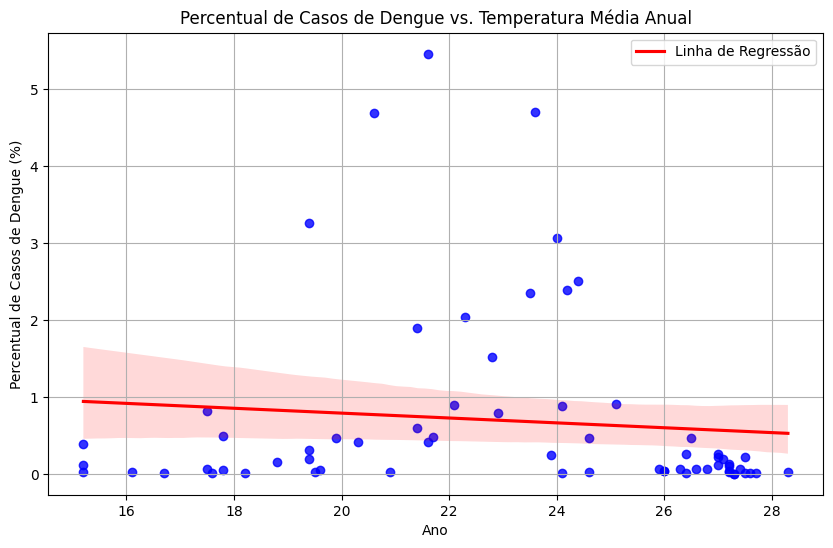



Mean Squared Error (MSE): 3.2819577868163265
R^2 Score: -0.09616324558291756


In [ ]:
# Calcular o percentual de casos de dengue
temp_media['Percentual_Casos'] = (temp_media['Casos Prováveis'] / temp_media['População 2010']) * 100

# Definir as variáveis independentes e dependentes
X = temp_media[['Ano']]  # Variável independente
y = temp_media['Percentual_Casos']  # Variável dependente

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Criar o gráfico com seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Ano', y='Percentual_Casos', data=temp_media, ci=95,
            scatter_kws={'color': 'blue'},  # Cor dos pontos
            line_kws={'color': 'red', 'label': 'Linha de Regressão'})  # Cor da linha de regressão
plt.title('Percentual de Casos de Dengue vs. Temperatura Média Anual')
plt.xlabel('Ano')
plt.ylabel('Percentual de Casos de Dengue (%)')
plt.legend()
plt.grid(True)
plt.show()
print('\n')
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

### Resultado

Da mesma forma, o erro quadrado é consideravelmente baixo, mas o R² é negativo. Nesse sentido, apesar de ter uma boa aproximação entres os dados de testes e os dados reais, o moledo não está se ajustando bem aos dados.

## Quarta Análise

Seguindo a mesma lógica de separar diversos períodos por estação, foi feita uma regresão linear a temperatura do período em questão com o número de casos de dengue.

Analisando a estação: Verão
Mean Squared Error (MSE) para Verão: 0.6025632668459068
R^2 Score para Verão: -0.3011359024473974


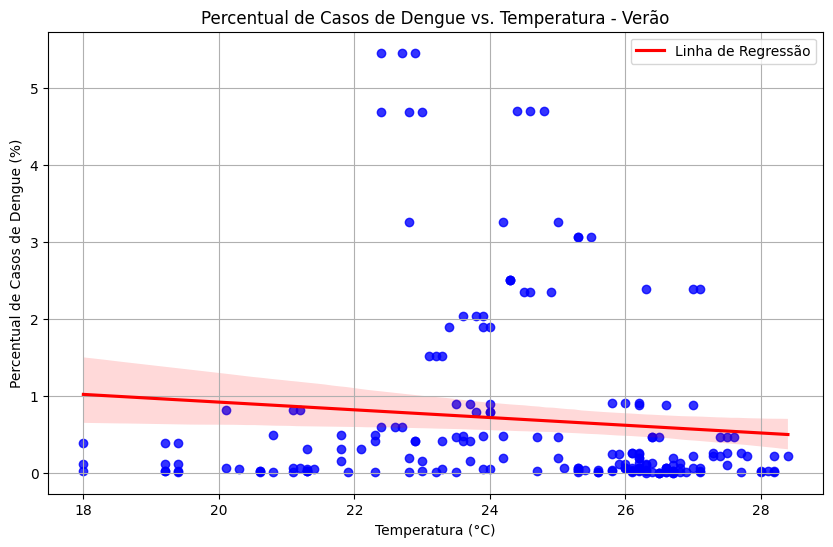

Analisando a estação: Outono
Mean Squared Error (MSE) para Outono: 0.5823923912903132
R^2 Score para Outono: -0.2575802265321361


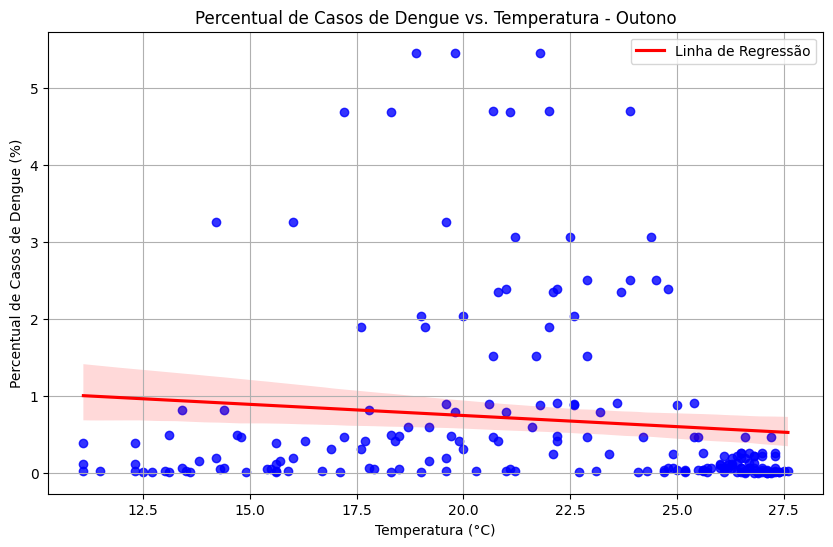

Analisando a estação: Inverno
Mean Squared Error (MSE) para Inverno: 0.5813139871279404
R^2 Score para Inverno: -0.2552515907685311


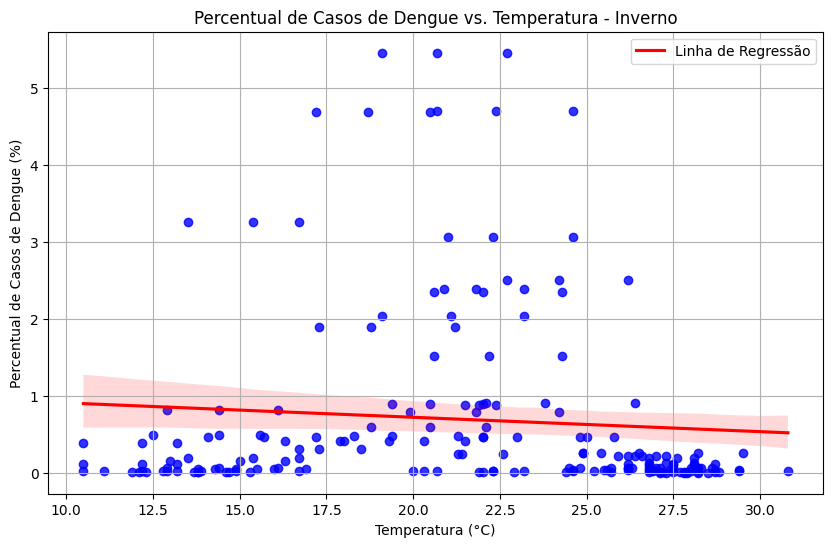

Analisando a estação: Primavera
Mean Squared Error (MSE) para Primavera: 0.5773014155228806
R^2 Score para Primavera: -0.24658710479046486


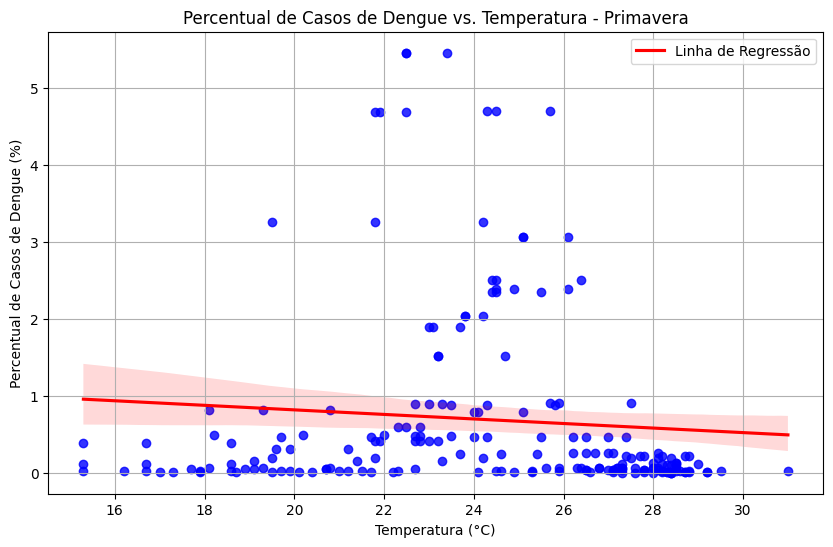

In [ ]:
# Calcular o percentual de casos de dengue
temp_media['Percentual_Casos'] = (temp_media['Casos Prováveis'] / temp_media['População 2010']) * 100

# Transformar os dados para temperatura mensal
monthly_temp_data = temp_media.melt(
    id_vars=['Município', 'UF', 'Ano', 'Percentual_Casos'],
    value_vars=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    var_name='Mês',
    value_name='Temperatura'
)

# Definir a estação do ano
def get_season(month):
    if month in ['Janeiro', 'Fevereiro', 'Março']:
        return 'Verão'
    elif month in ['Abril', 'Maio', 'Junho']:
        return 'Outono'
    elif month in ['Julho', 'Agosto', 'Setembro']:
        return 'Inverno'
    elif month in ['Outubro', 'Novembro', 'Dezembro']:
        return 'Primavera'

monthly_temp_data['Estação'] = monthly_temp_data['Mês'].apply(get_season)

# Ajustar o modelo para cada estação
for season in monthly_temp_data['Estação'].unique():
    print(f"Analisando a estação: {season}")
    season_data = monthly_temp_data[monthly_temp_data['Estação'] == season]

    X = season_data[['Temperatura']]
    y = season_data['Percentual_Casos']

    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Criar o modelo de regressão linear
    model = LinearRegression()

    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Fazer previsões com os dados de teste
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE) para {season}: {mse}")
    print(f"R^2 Score para {season}: {r2}")

    # Criar o gráfico para cada estação
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Temperatura', y='Percentual_Casos', data=season_data, ci=95,
                scatter_kws={'color': 'blue'},
                line_kws={'color': 'red', 'label': 'Linha de Regressão'})
    plt.title(f'Percentual de Casos de Dengue vs. Temperatura - {season}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Percentual de Casos de Dengue (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

### Resultado

Abaixo está a análise de cada um dos resultados plotados e cálculados em relação a cada estação.

### Verão

 - Mean Squared Error (MSE): 0.6025
 - R² Score: -0.3011

### Outono

 - Mean Squared Error (MSE): 0.5823
 - R² Score: -0.2575

### Inverno

 - Mean Squared Error (MSE): 0.5813
 - R² Score: -0.2552

### Primavera

 - Mean Squared Error (MSE): 0.5773
 - R² Score: -0.2465


 Análise: o erro foi quadrado é consideravelmente baixo em todas as estações, mas o R² é negativo, o que mostra que mesmo que tenha uma boa aproximação, essa regressão não representa bem os dados, para cada uma das estações.

## Conclusão

Teoricamente, antes de fazer a análise, o nível de pluviosidade e uma temperatura elevada, deveriam implicar em um número de casos de dengue maior. No entanto, com as análises e testes feitos, o que se pode concluir é que esses dados não possuem uma relação linear entre si. Nesse sentido, aparentemente, bastar ter um nível de pluviosidade e uma temperatura adequada para que os casos de dengue se tornem mais elevados.

# Referências

DATASUS Tecnologia da Informação a Serviço do SUS. DENGUE - Notificações registradas no Sistema de Informação de Agravos de Notificação - Brasil. Disponível em: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/denguebbr.def. Acesso em: 20 abr. 2024.

Instituto Nacional de Tecnologia. NORMAIS CLIMATOLÓGICAS DO BRASIL. Disponível em: https://portal.inmet.gov.br/normais. Acesso em: 01 jun. 2024.

Repositório no GitHub. Municípios e estados do Brasil. Disponível em: https://github.com/kelvins/municipios-brasileiros/tree/main/csv. Acesso em: 20 abr. 2024.